## Data from Sweeps

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
label_size = 16
text_size = 22
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['legend.fontsize'] = 16
#mpl.rcParams['legend.linewidth'] = 4
mpl.rcParams['axes.titlesize'] = text_size
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['figure.figsize'] = (30,20)
mpl.rcParams['figure.dpi'] = 1200
mpl.rcParams['figure.autolayout'] = False
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import IPython as ip
ip.core.display.set_matplotlib_formats('png', 'jpeg', quality=90)
%matplotlib inline

In [33]:
import pandas as pd 
import sqlite3
import os
import collections
import math

In [34]:
NVTrace = collections.namedtuple('NVTrace', 'data unit devices streams stream_ids')

In [35]:
def get_power_values(x):
    # covert x into string
    y = str(x)
    return int(y.split('/')[0]) / 1000.

def get_freq_values(x):
    # covert x into string
    y = str(x)
    return int(y.split('/')[0])

system_types = {'freq':['[SM/Memory Clock (MHz)]',get_freq_values],
 'temp':['[Temperature (C)]', float ],
 'pwr':['[Power/Limit (mW)]',get_power_values]}

def read_nvprof_gpu_trace(trace, tag="", tag_it=False):
    list_of_lines = []
    with open(trace) as f:
        lines = f.readlines()

        for line in lines:
            if "==" in line:
                continue
            arr = line.strip().split(',')
            arr = [i.strip("\"") for i in arr] 
            list_of_lines.append(arr)
    titles = list_of_lines[0]
    if tag_it:
        titles = [tag+"_"+t for t in titles]
    print(titles)
    data = list_of_lines[2:]
#     print(len(data))
    data = [ d for d in data if len(d) == len(titles)]
#     return titles, data
    print(len(data))
    df = pd.DataFrame(data=data, columns=titles)
    df.to_csv("temp_out")
    df = pd.read_csv("temp_out", index_col=0)
    units = {i:j for i,j in zip(list_of_lines[0],list_of_lines[1])}
    devices = list(df.Device.unique())
    kind = list(df.Name.unique())
    kind_dict = {k:i for i,k in enumerate(kind)}
    df['ones'] = df['Name']
    df.ones = df.ones.replace(kind_dict)
    print(kind_dict)
    
    for k,v in system_types.items():
        df[k] = df[(df.Name == v[0])].System.apply(v[1])

    return NVTrace(df, units, devices, kind, kind_dict)


In [36]:
# base_dir = "./run_setup"
base_dir = "./new_strategy"
file_dict = {f.split(".")[0]:os.path.join(base_dir,f) for f in os.listdir(base_dir) if "csv" in f }
# file_dict = sorted(file_dict)
df_dict = {k:read_nvprof_gpu_trace(v) for k,v in file_dict.items()}

In [37]:
df_dict = {k:read_nvprof_gpu_trace(v) for k,v in file_dict.items()}

['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'Src Dev', 'Src Ctx', 'Dst Dev', 'Dst Ctx', 'System', 'Name', 'Correlation_ID']
2684
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy HtoD]': 3, '[CUDA memcpy PtoP]': 4}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'Src Dev', 'Src Ctx', 'Dst Dev', 'Dst Ctx', 'System', 'Name', 'Correlation_ID']
3796
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy HtoD]': 3, '[CUDA memcpy PtoP]': 4}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dyn

['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'Src Dev', 'Src Ctx', 'Dst Dev', 'Dst Ctx', 'System', 'Name', 'Correlation_ID']
2584
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy HtoD]': 3, '[CUDA memcpy PtoP]': 4}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'Src Dev', 'Src Ctx', 'Dst Dev', 'Dst Ctx', 'System', 'Name', 'Correlation_ID']
2484
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy HtoD]': 3, '[CUDA memcpy PtoP]': 4}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dyn

{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy HtoD]': 3, '[CUDA memcpy PtoP]': 4}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'Src Dev', 'Src Ctx', 'Dst Dev', 'Dst Ctx', 'System', 'Name', 'Correlation_ID']
6616
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy HtoD]': 3, '[CUDA memcpy PtoP]': 4}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'Src Dev', 'Src Ctx', 'Dst Dev', 'Dst Ctx', 'System', 'Name', 'Correlation_ID']
7048
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy HtoD]': 3, '[CUDA memcpy PtoP]': 4

In [38]:
v.unit['Duration']

'ms'

In [39]:
collect = []
titles = ['exp', 'reps', 'inputSize', 'numBroads', 'kernel', 'minStart', 'maxStart', 'numStart', 'avgDuration', 'avgThroughput','freq','temp','pwr']
for k, v in df_dict.items():
    if "test3" in k:
        li = k.split("_")
        if len(li) > 3:
            out_list = []
            for it in li:
                out_list.append(it)
                print(it, end=',')
            print([i for i in v.streams if 'PtoP' in i][0], end=',')
            kern = [i for i in v.streams if 'PtoP' in i][0]
            out_list.append(kern)
            min_start = v.data[(v.data.Device == v.devices[0]) & (v.data.Name == kern)].Start.min()
            max_start = v.data[(v.data.Device == v.devices[0]) & (v.data.Name == kern)].Start.max()
            count = v.data[(v.data.Device == v.devices[0]) & (v.data.Name == kern)].Start.count()
            print(min_start, max_start, count, sep=',', end=',')
            out_list.append(min_start)
            out_list.append(max_start)
            out_list.append(count)
            a = v.data[(v.data.Device == v.devices[0])& ((v.data.Start > min_start) & (v.data.Start < max_start))]
            print(a[a.Name==kern].Duration.mean(), end=',')
            print(a[a.Name==kern].Throughput.mean(), end=',')
            if v.unit['Duration'] == 'ms':
                out_list.append(a[a.Name==kern].Duration.mean())
            else:
                out_list.append(a[a.Name==kern].Duration.mean()*1000)
            out_list.append(a[a.Name==kern].Throughput.mean())
#             sns.stripplot(x='Start', y='ones', hue='Name', data=a)
#             plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#             plt.show()

            for item, val in system_types.items():
                  print(a[a.Name==val[0]][item].mean(), end=',')
                  out_list.append(a[a.Name==val[0]][item].mean())
#                 sns.stripplot(x='Start', y=item, hue='Name', hue_order=[val[0]], data=a)
#                 plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#                 plt.show()
            print("\n",end='')
            collect.append(out_list)

test3,100,640,3,[CUDA memcpy PtoP],6.284624,11.761488,300,55.319674398648644,45.19187850337834,1305.0,43.03636363636364,76.43264545454555,
test3,100,1024,1,[CUDA memcpy PtoP],9.325447,18.08786,100,88.50704577551019,45.19414212244895,1305.0,44.0,73.68770857142856,
test3,100,896,1,[CUDA memcpy PtoP],8.311402000000001,15.978595,100,77.44423083673472,45.19381194897958,1305.0,43.95454545454545,73.51137012986996,
test3,100,1664,3,[CUDA memcpy PtoP],14.38447,28.673414,300,0.14433056081081058,45.035505976351416,1305.0,44.25174825174825,76.93557692307711,
test3,100,1152,2,[CUDA memcpy PtoP],10.309049,20.176838,200,99.67248363959398,45.147866675126934,1305.0,44.0,75.4516414141414,
test3,100,1024,3,[CUDA memcpy PtoP],9.32212,18.084636,300,88.50805473986478,45.19362681081083,1305.0,44.0,76.92171428571413,
test3,100,1792,2,[CUDA memcpy PtoP],15.423426000000001,30.817637,200,0.15549491878172522,45.01756755837565,1305.0,44.103896103896105,75.48941883116936,
test3,100,256,1,[CUDA memcpy PtoP],3.225475

In [40]:
collectdf = pd.DataFrame(data=collect, columns=titles)
collectdf.sort_values(by='inputSize', inplace=True)
o =list(collectdf.inputSize.unique())
print(o)
o = [int(i) for i in o]
o.sort()
o = [str(i) for i in o] 
collectdf.columns

['1024', '1152', '128', '1280', '1408', '1536', '1664', '1792', '1920', '256', '512', '640', '768', '896']


In [41]:
collectdf.columns

Index(['exp', 'reps', 'inputSize', 'numBroads', 'kernel', 'minStart',
       'maxStart', 'numStart', 'avgDuration', 'avgThroughput', 'freq', 'temp',
       'pwr'],
      dtype='object')

In [42]:
o = [int(i) for i in o]
o.sort()
o = [str(i) for i in o] 

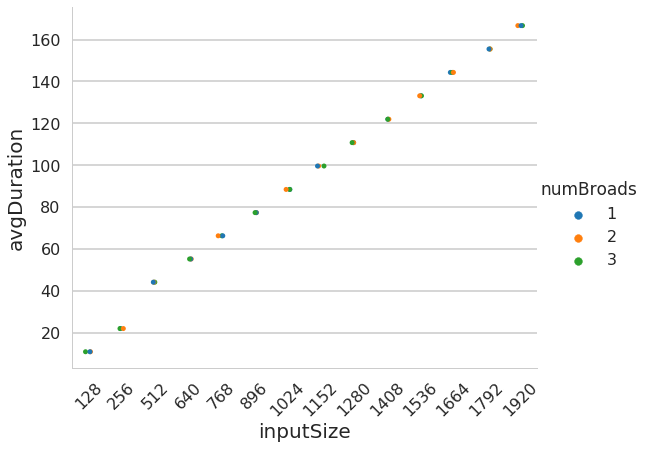

In [43]:
charts = sns.catplot(x='inputSize', y='avgDuration', hue='numBroads', data=collectdf, order=o, aspect=1.3, height=6)
for chart in charts.axes.flat:
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

['test3', '100', '640', '3'] ['[CUDA memcpy PtoP]']
6.284624


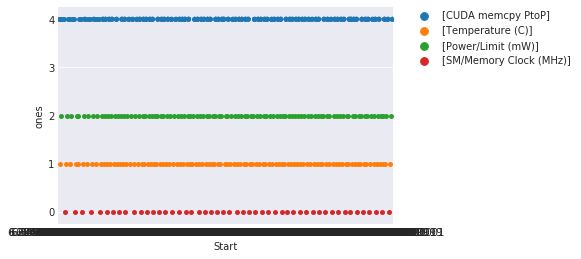

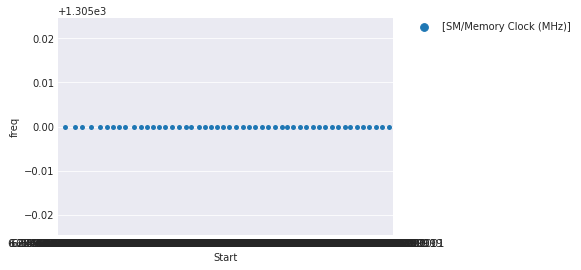

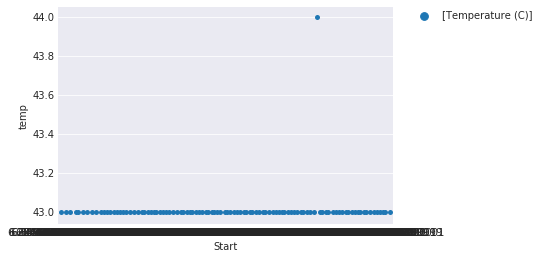

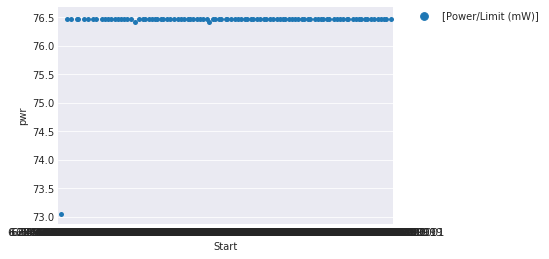

['test3', '100', '1024', '1'] ['[CUDA memcpy PtoP]']
9.325447


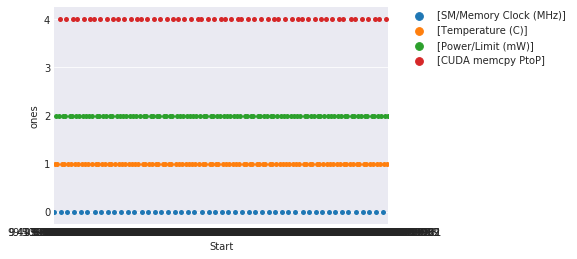

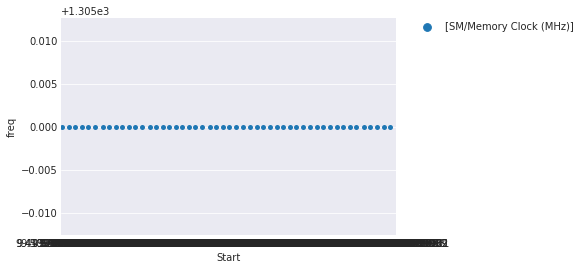

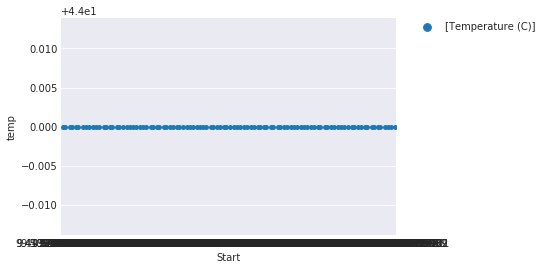

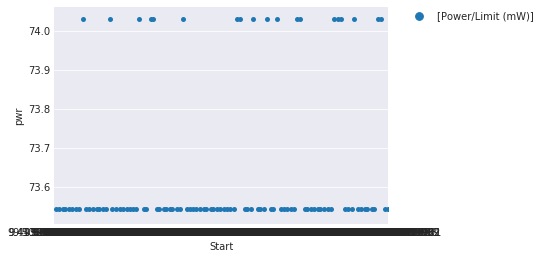

['test3', '100', '896', '1'] ['[CUDA memcpy PtoP]']
8.311402000000001


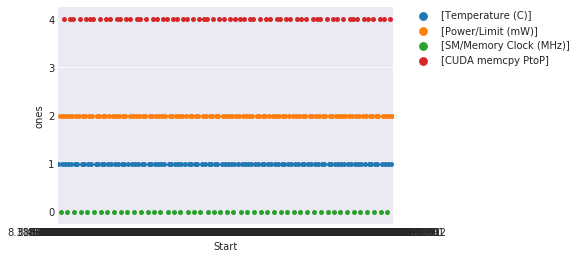

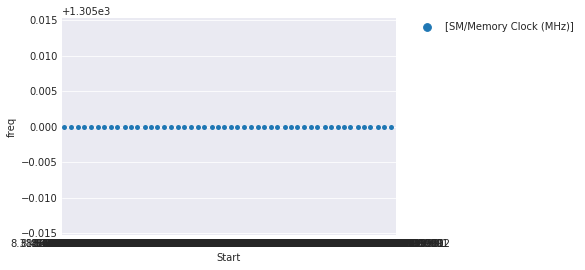

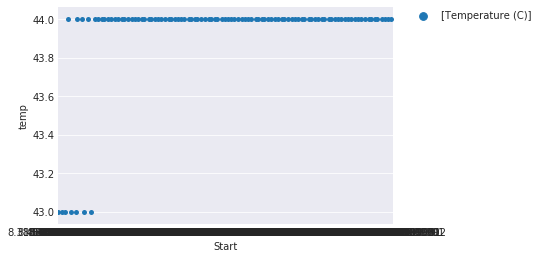

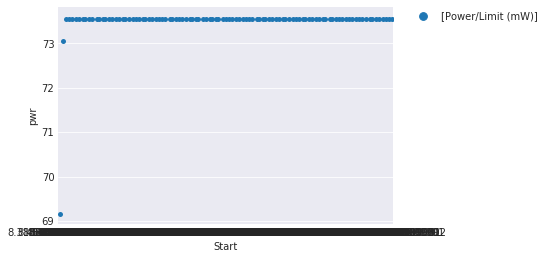

['test3', '100', '1664', '3'] ['[CUDA memcpy PtoP]']
14.38447


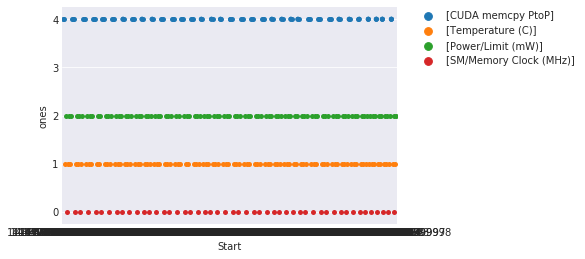

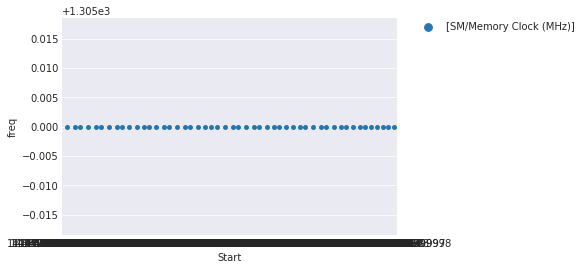

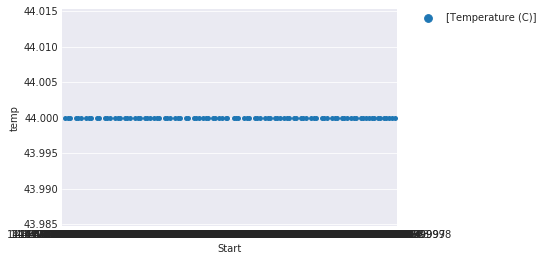

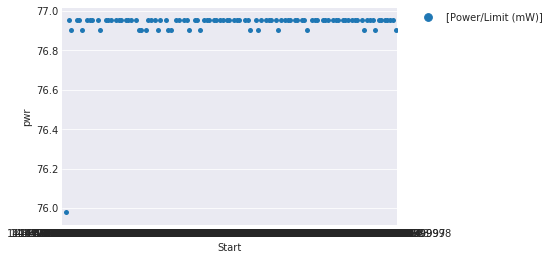

['test3', '100', '1152', '2'] ['[CUDA memcpy PtoP]']
10.309049


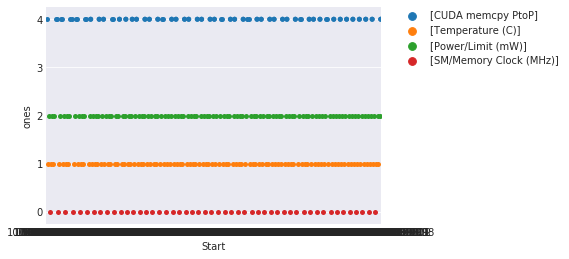

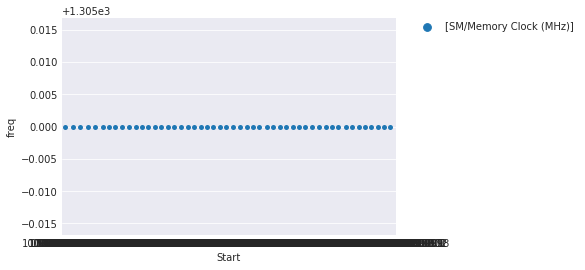

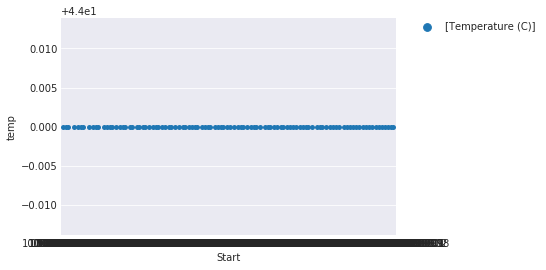

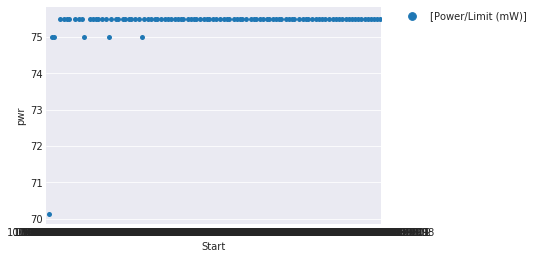

['test3', '100', '1024', '3'] ['[CUDA memcpy PtoP]']
9.32212


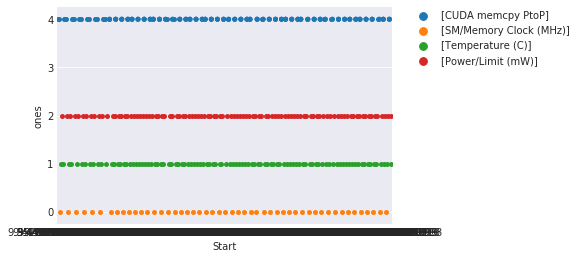

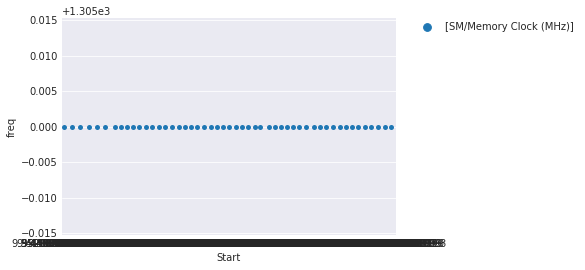

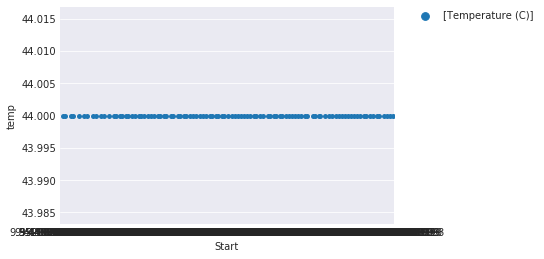

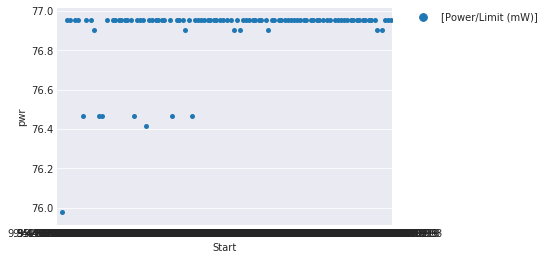

['test3', '100', '1792', '2'] ['[CUDA memcpy PtoP]']
15.423426000000001


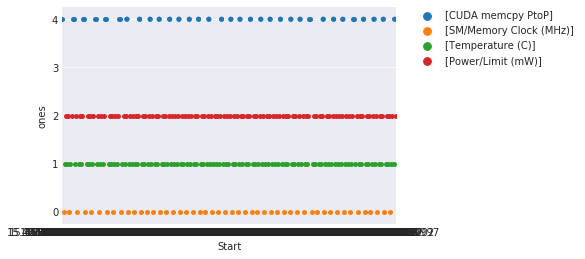

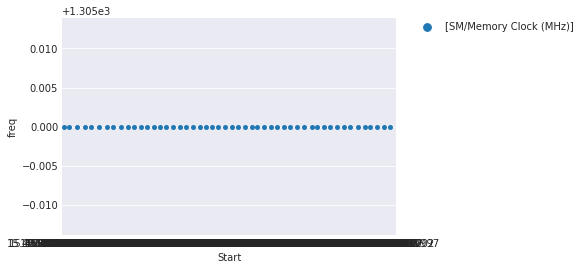

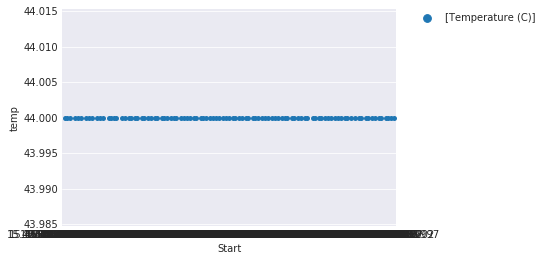

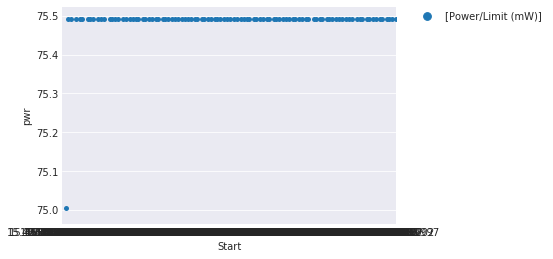

['test3', '100', '256', '1'] ['[CUDA memcpy PtoP]']
3.225475


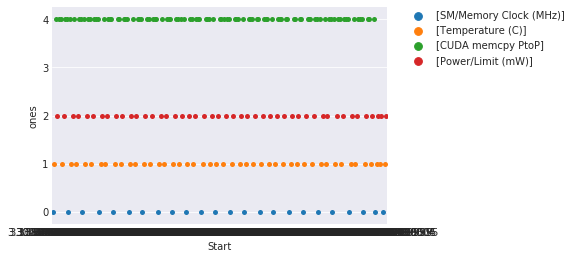

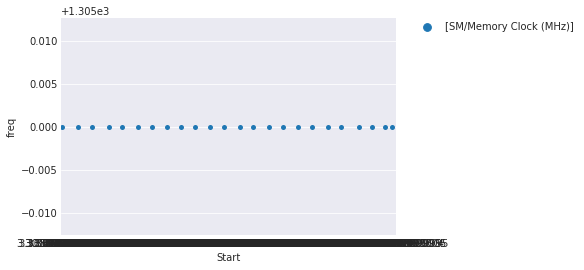

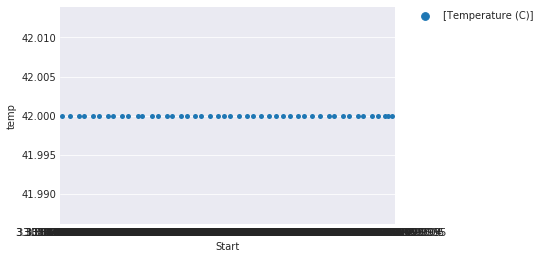

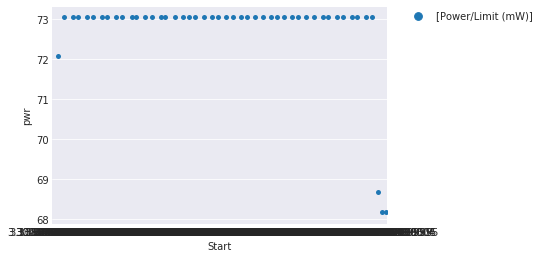

['test3', '100', '1024', '2'] ['[CUDA memcpy PtoP]']
9.316396000000001


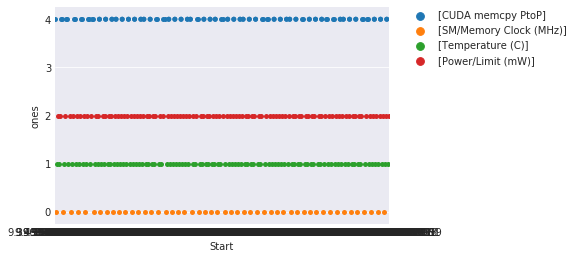

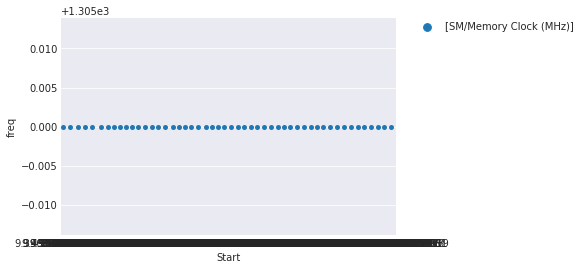

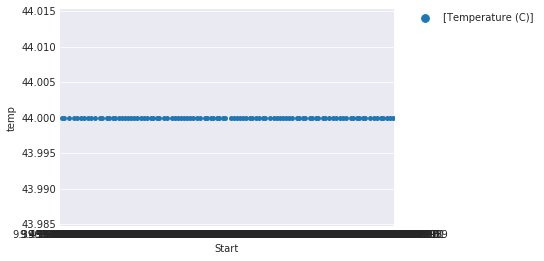

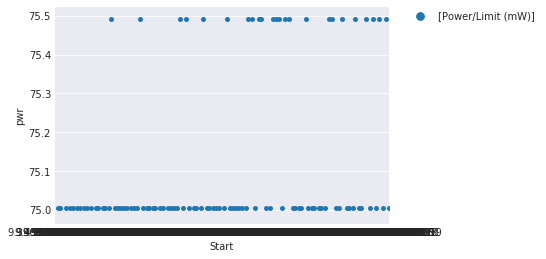

['test3', '100', '1792', '1'] ['[CUDA memcpy PtoP]']
15.256766


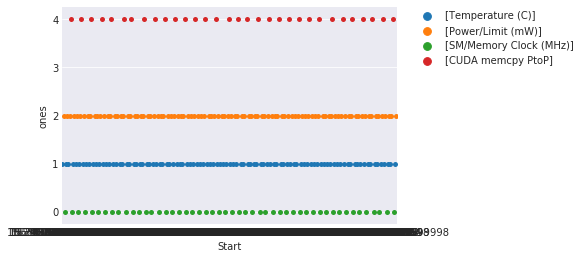

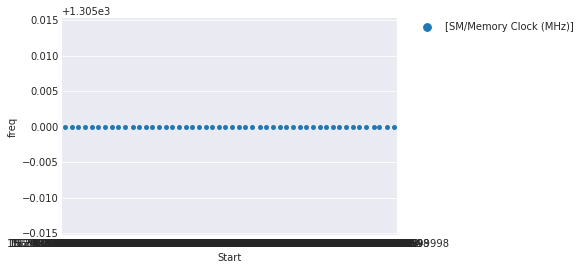

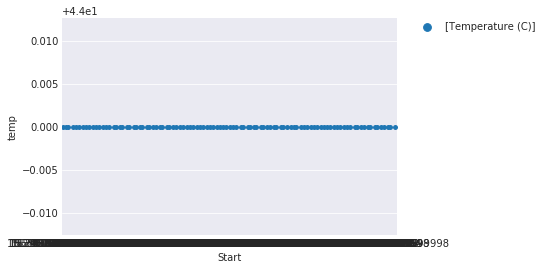

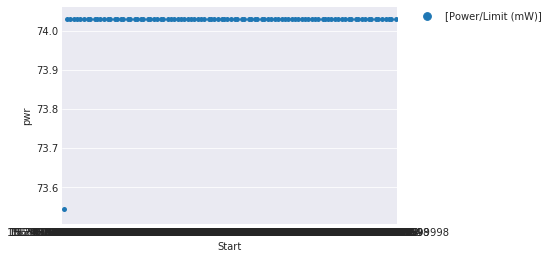

['test3', '100', '256', '3'] ['[CUDA memcpy PtoP]']
3.209755


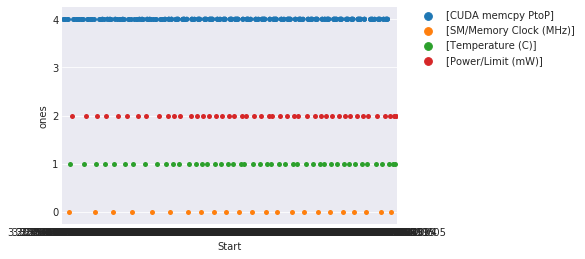

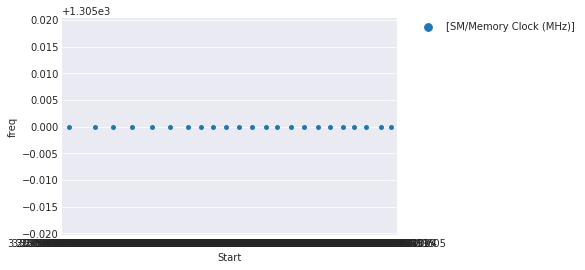

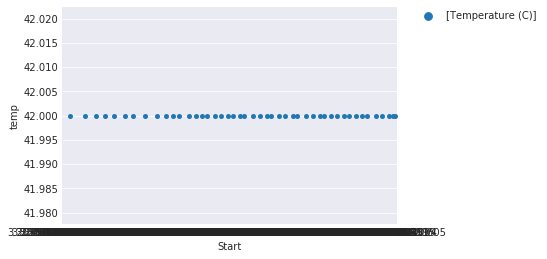

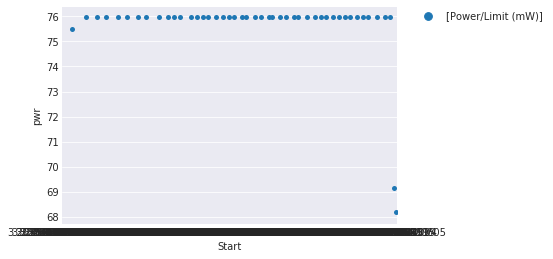

['test3', '100', '1152', '1'] ['[CUDA memcpy PtoP]']
10.296725


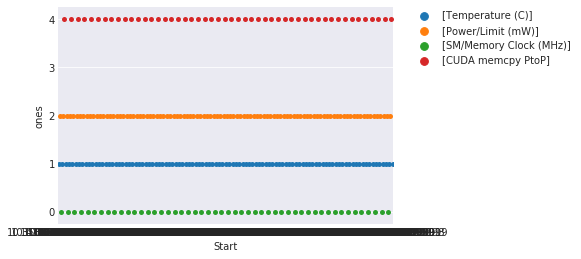

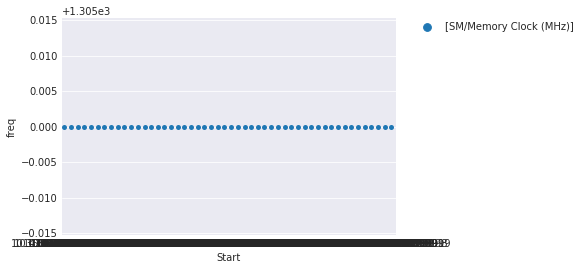

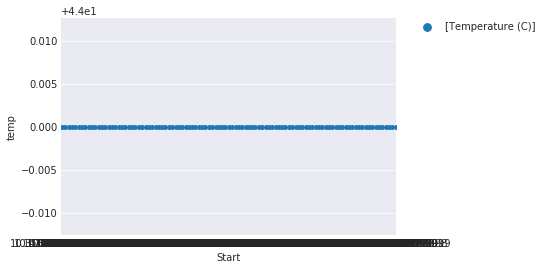

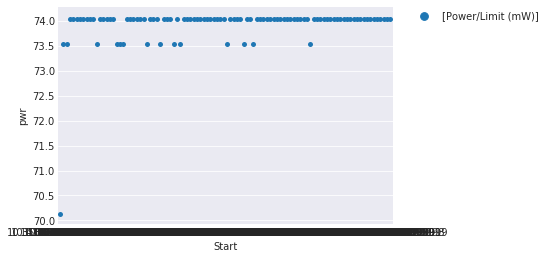

['test3', '100', '1408', '1'] ['[CUDA memcpy PtoP]']
12.369874000000001


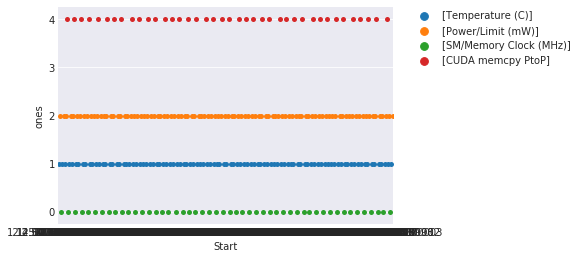

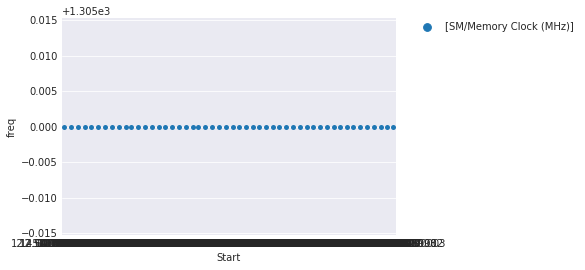

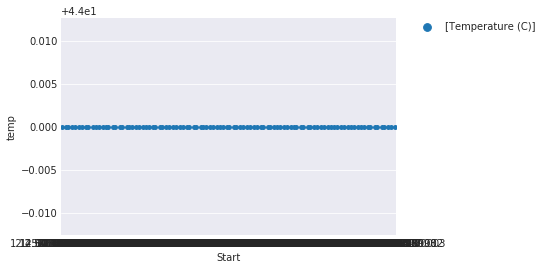

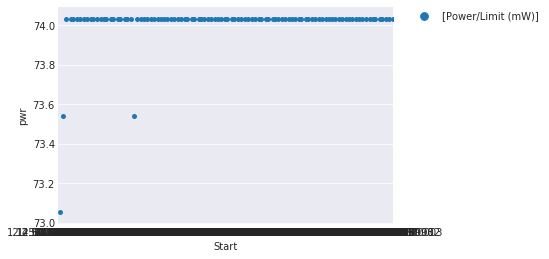

['test3', '100', '128', '1'] ['[CUDA memcpy PtoP]']
2.217877


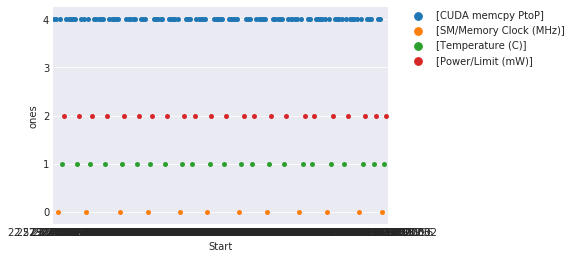

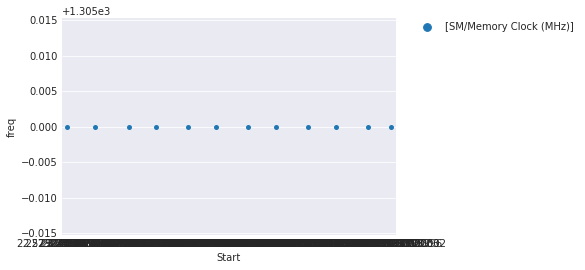

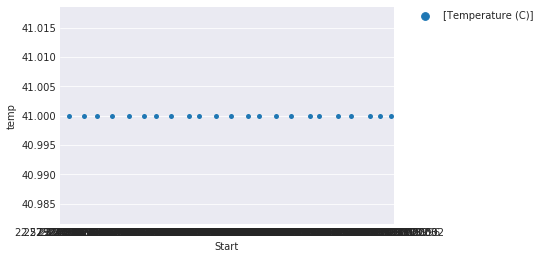

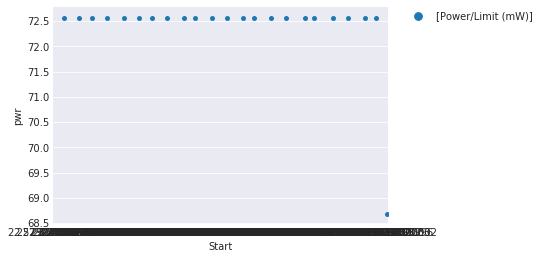

['test3', '100', '512', '2'] ['[CUDA memcpy PtoP]']
5.245689


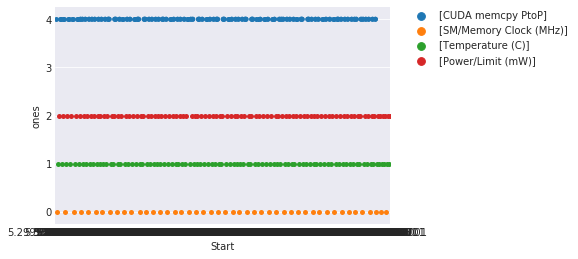

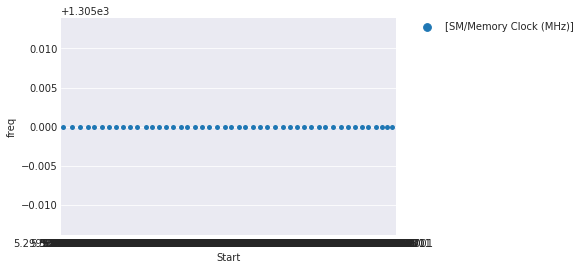

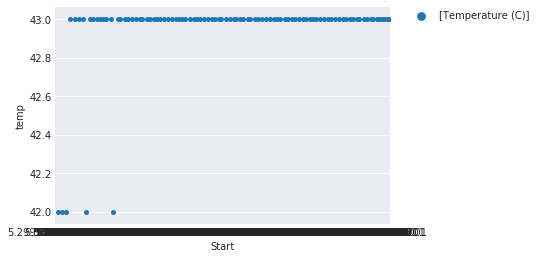

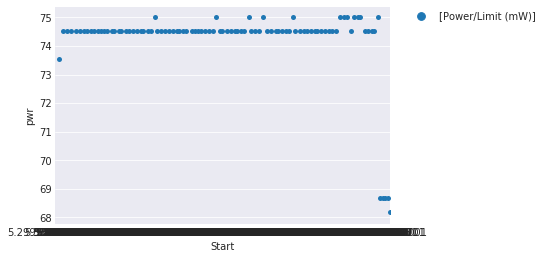

['test3', '100', '1536', '1'] ['[CUDA memcpy PtoP]']
13.35295


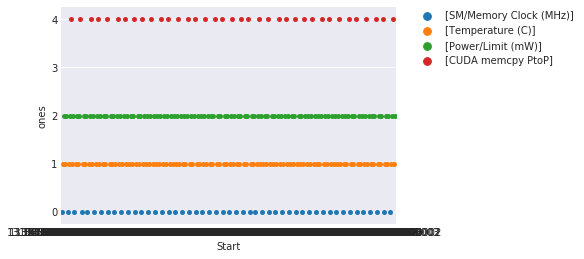

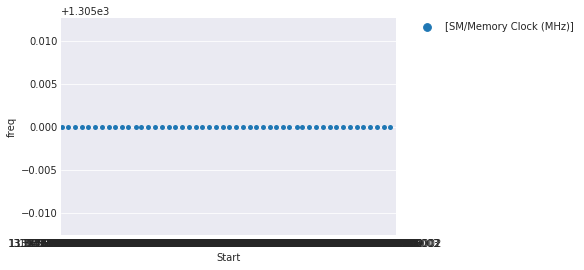

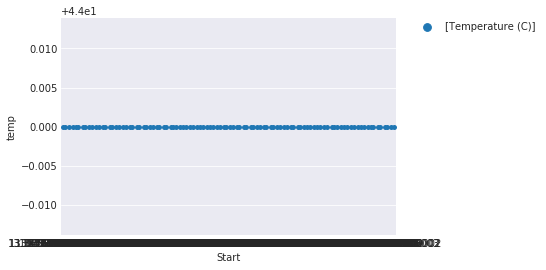

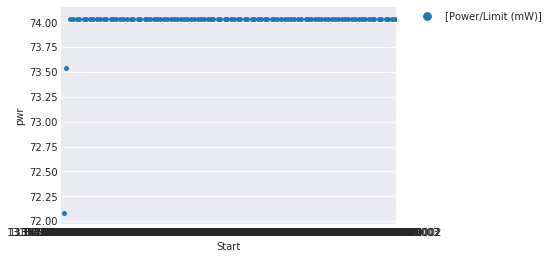

['test3', '100', '1280', '2'] ['[CUDA memcpy PtoP]']
11.307205999999999


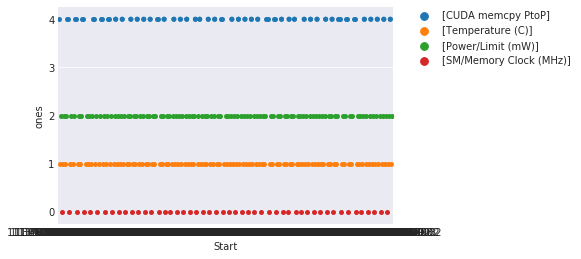

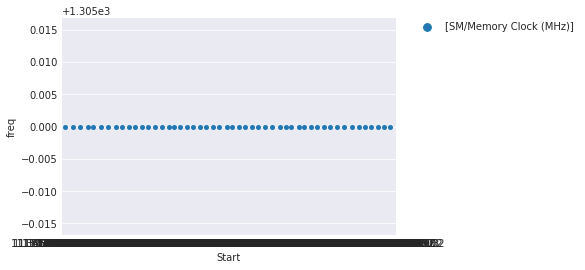

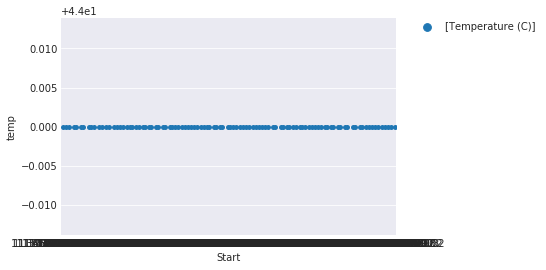

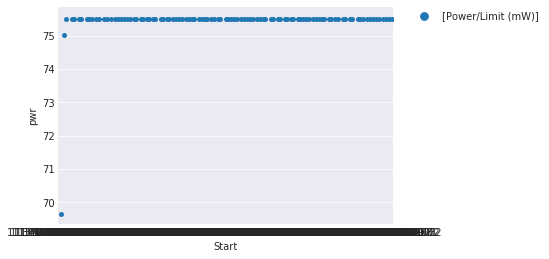

['test3', '100', '128', '2'] ['[CUDA memcpy PtoP]']
2.24491


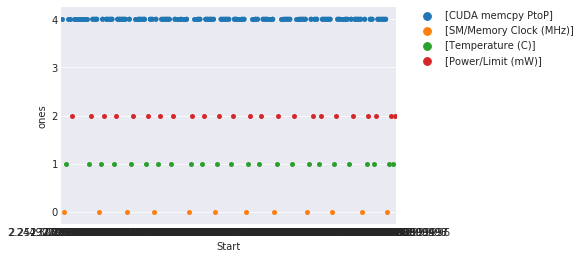

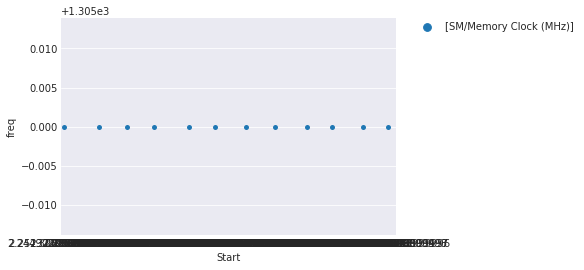

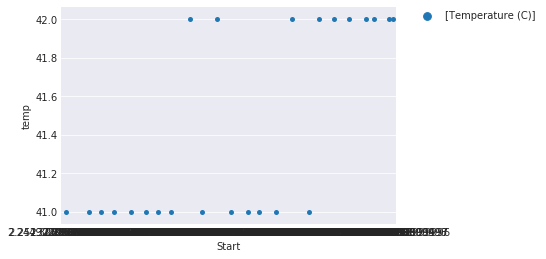

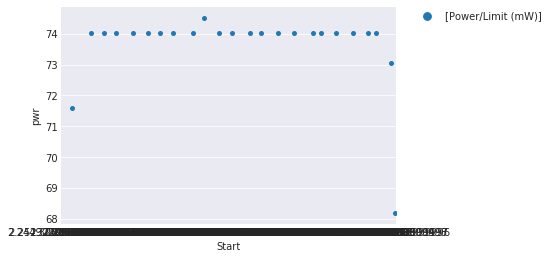

['test3', '100', '512', '3'] ['[CUDA memcpy PtoP]']
5.243926


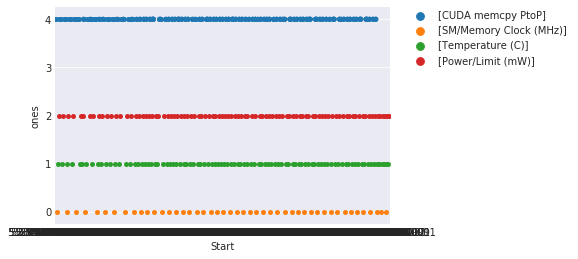

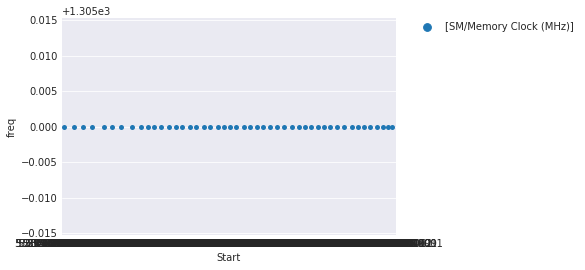

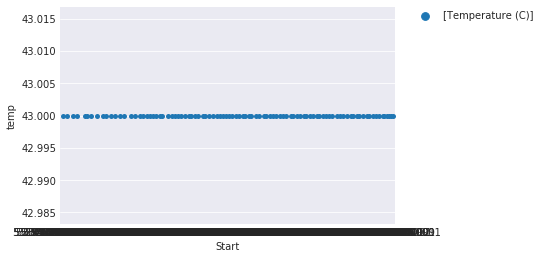

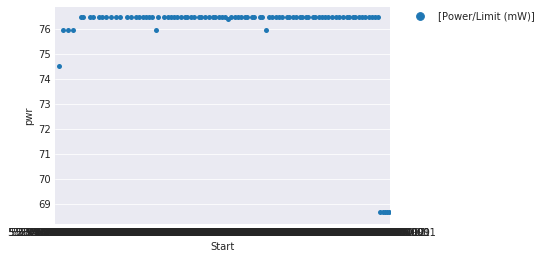

['test3', '100', '256', '2'] ['[CUDA memcpy PtoP]']
3.22554


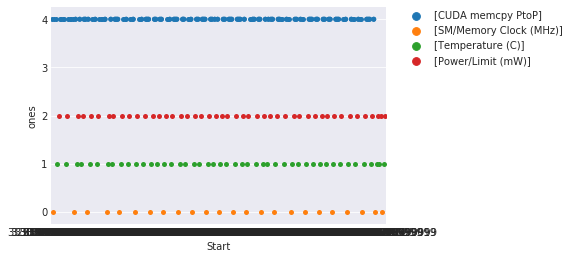

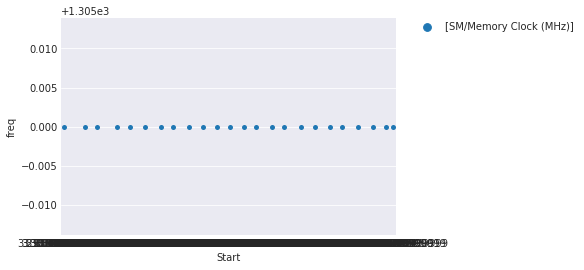

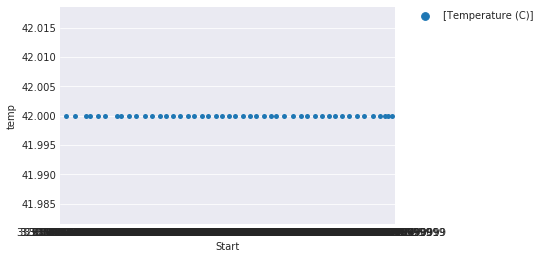

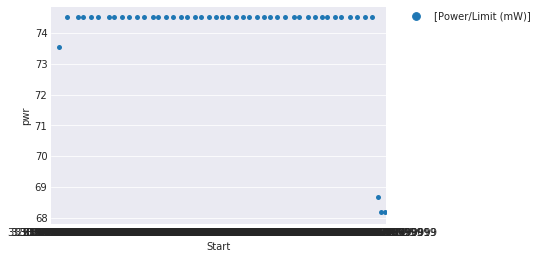

['test3', '100', '128', '3'] ['[CUDA memcpy PtoP]']
2.207488


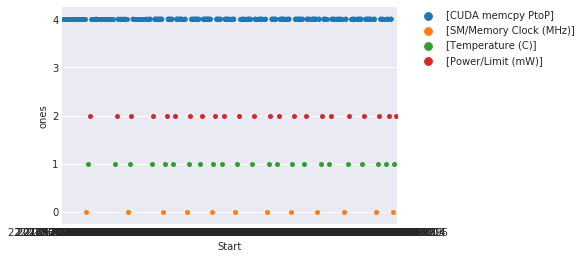

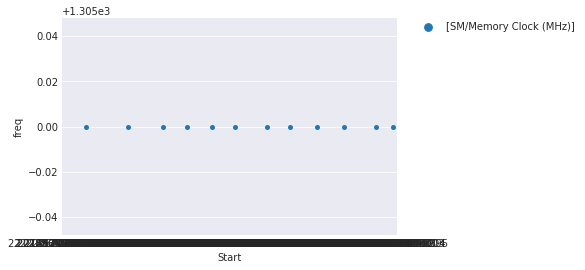

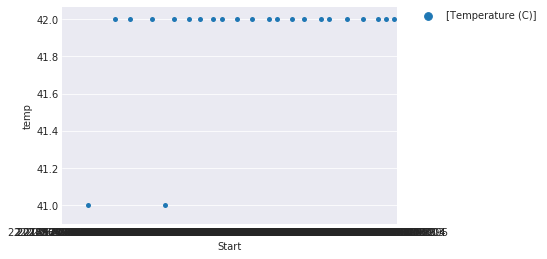

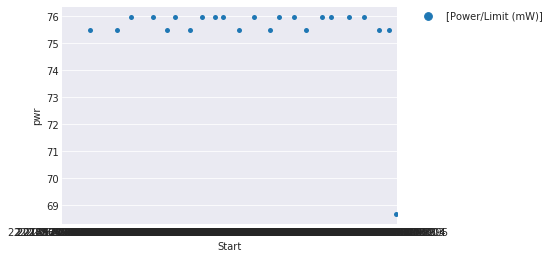

['test3', '100', '640', '2'] ['[CUDA memcpy PtoP]']
6.261463


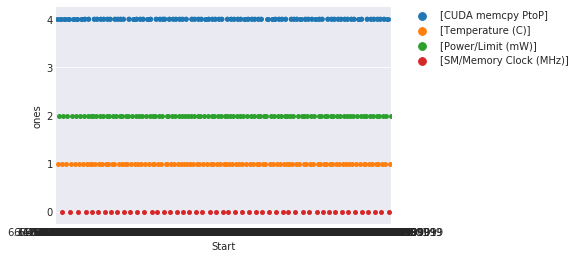

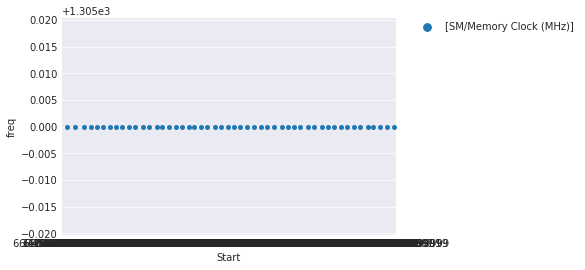

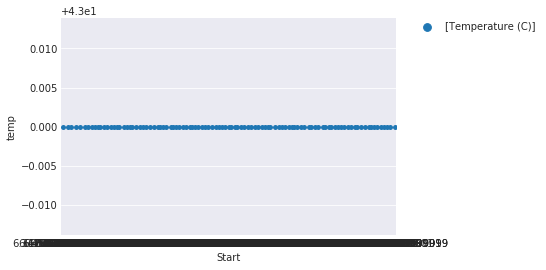

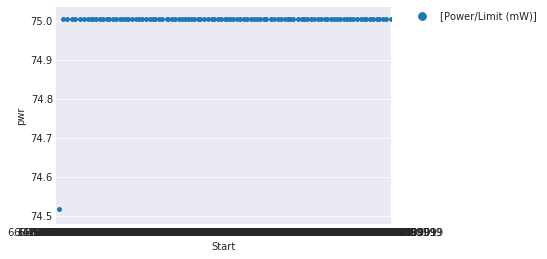

['test3', '100', '640', '1'] ['[CUDA memcpy PtoP]']
6.267856


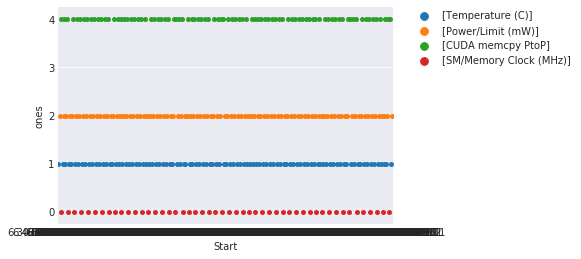

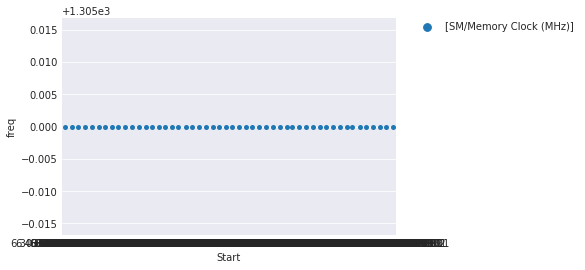

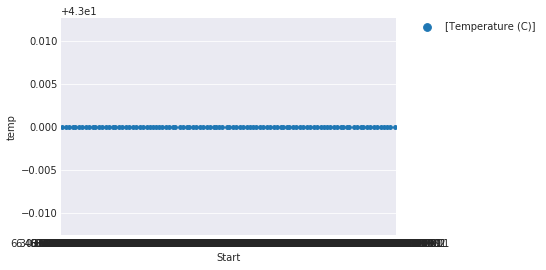

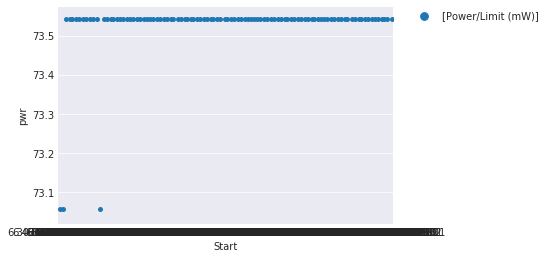

['test3', '100', '1152', '3'] ['[CUDA memcpy PtoP]']
10.289105000000001


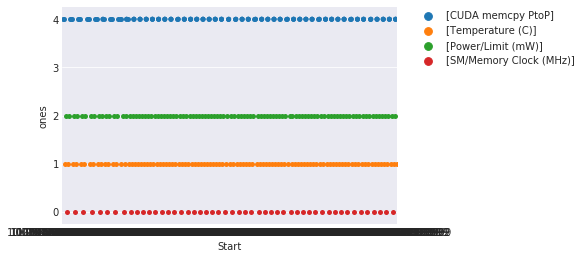

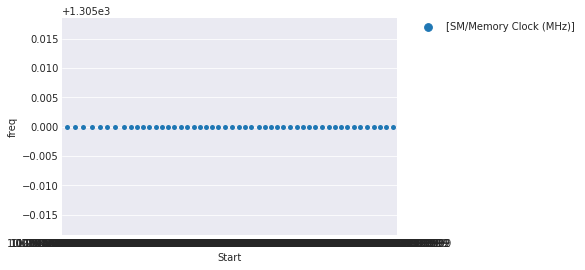

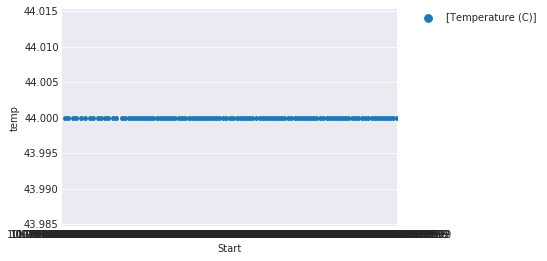

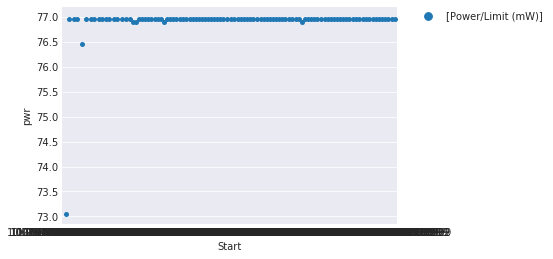

['test3', '100', '768', '1'] ['[CUDA memcpy PtoP]']
7.271533


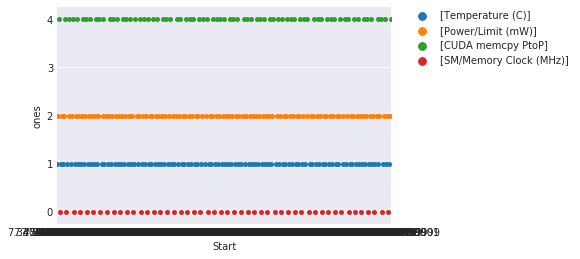

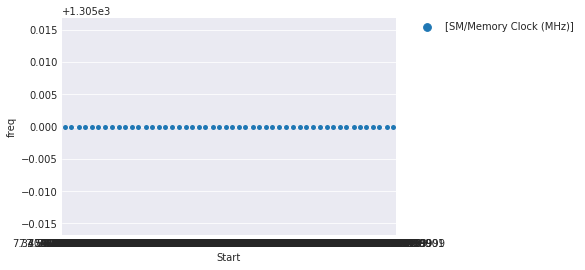

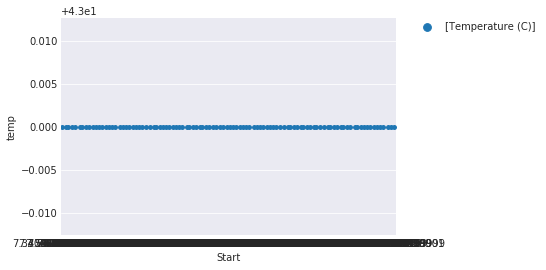

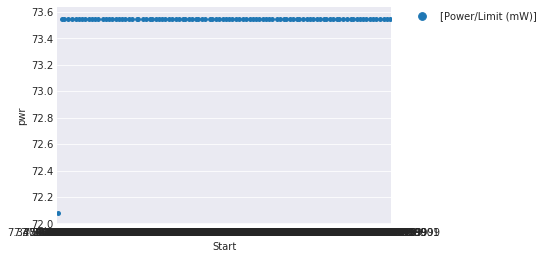

['test3', '100', '768', '3'] ['[CUDA memcpy PtoP]']
7.261131


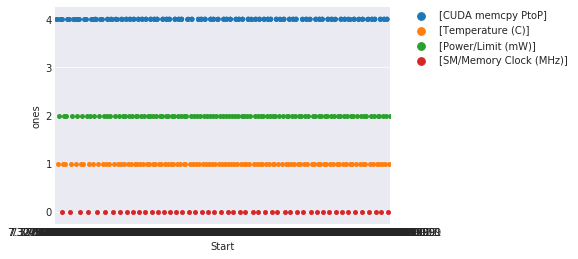

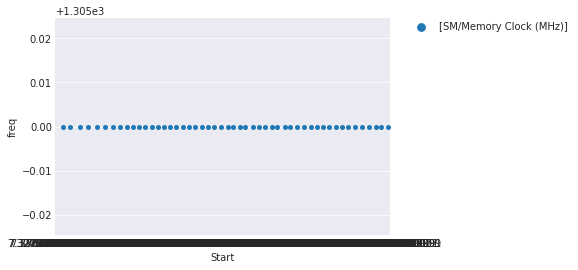

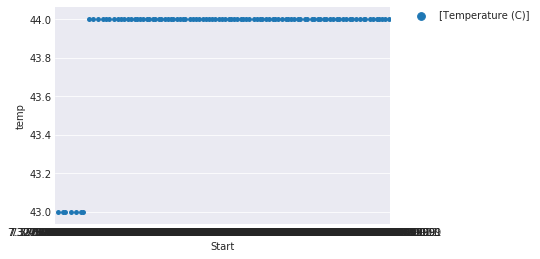

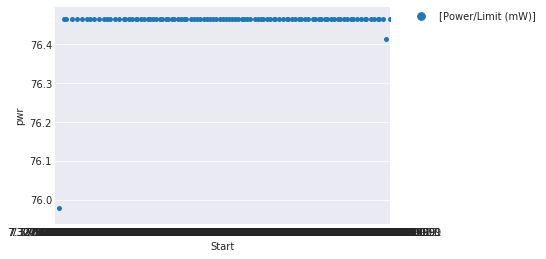

['test3', '100', '1408', '3'] ['[CUDA memcpy PtoP]']
12.340239


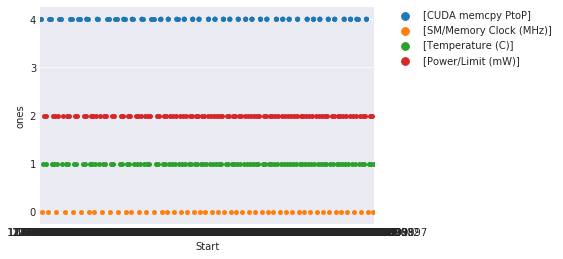

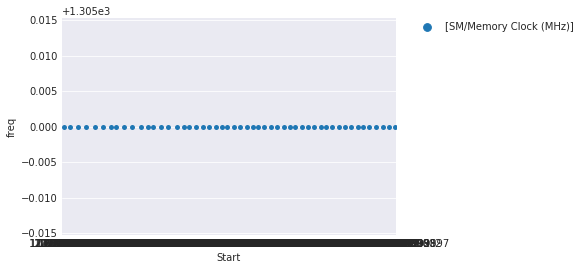

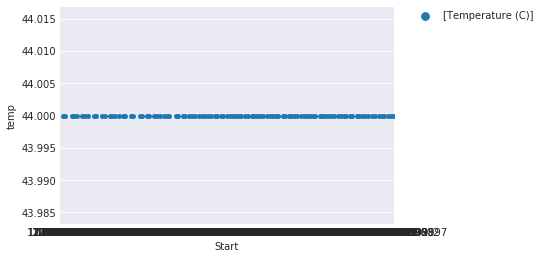

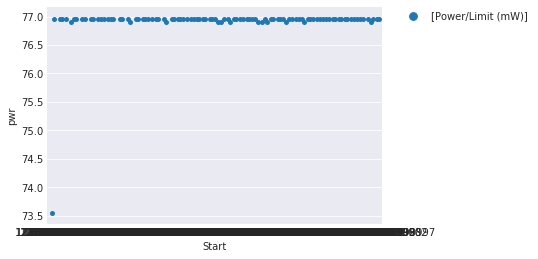

['test3', '100', '1664', '1'] ['[CUDA memcpy PtoP]']
14.384715


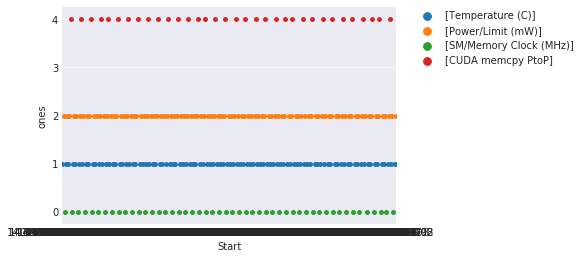

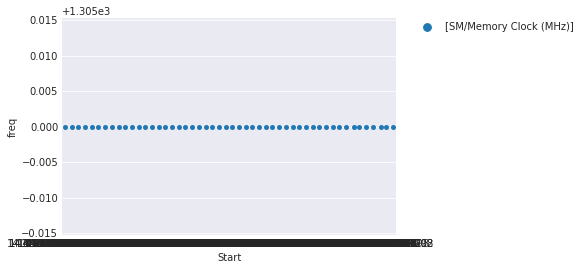

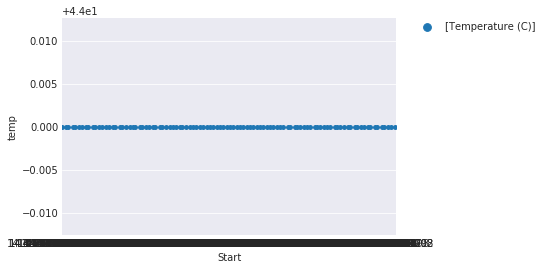

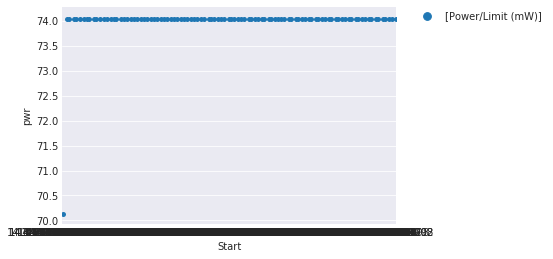

['test3', '100', '1664', '2'] ['[CUDA memcpy PtoP]']
14.370897


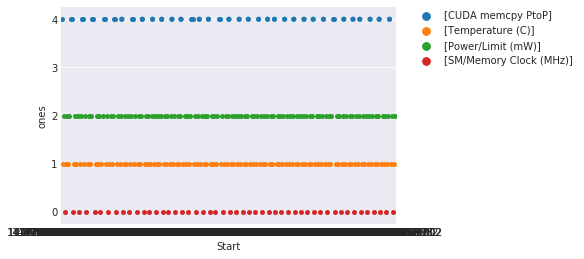

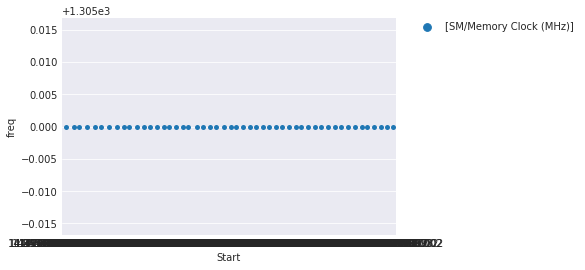

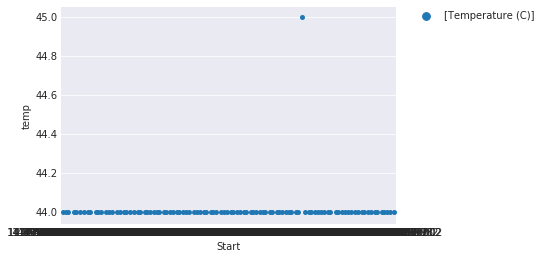

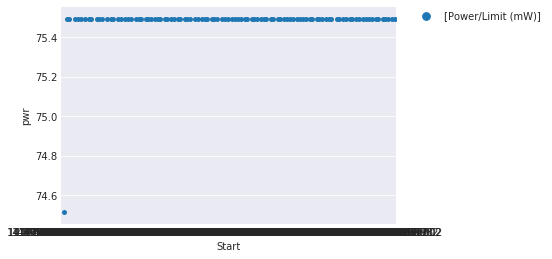

['test3', '100', '896', '3'] ['[CUDA memcpy PtoP]']
8.295001


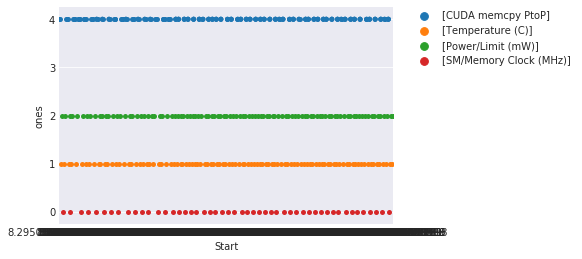

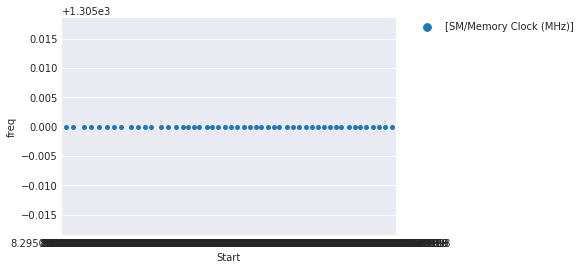

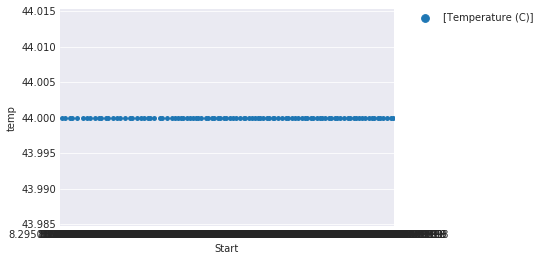

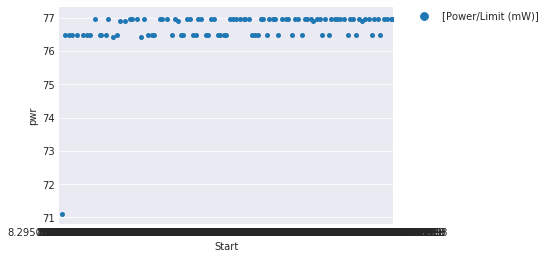

['test3', '100', '1536', '2'] ['[CUDA memcpy PtoP]']
13.392369


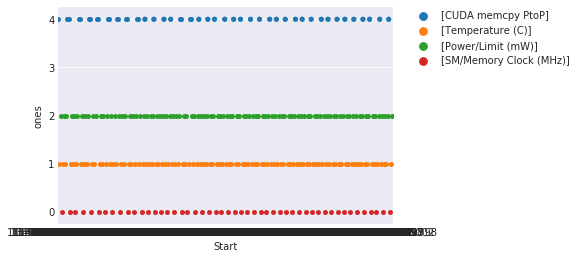

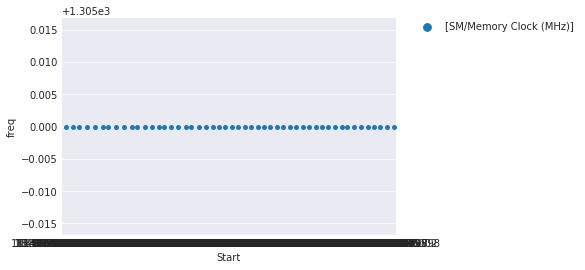

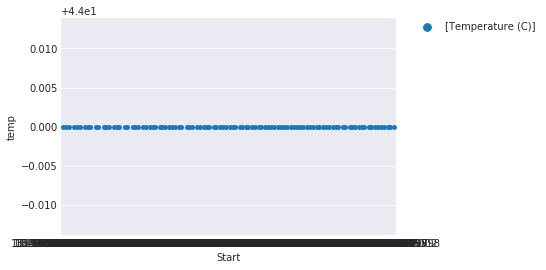

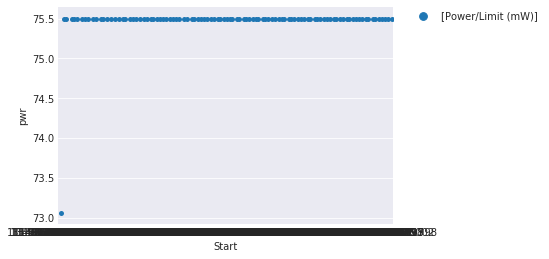

['test3', '100', '1536', '3'] ['[CUDA memcpy PtoP]']
13.384402


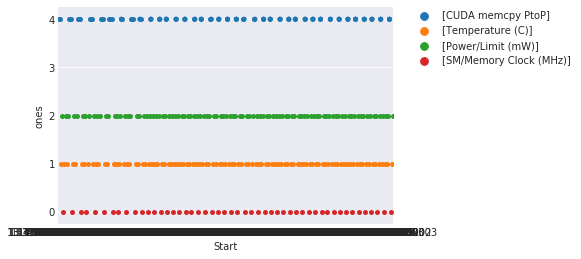

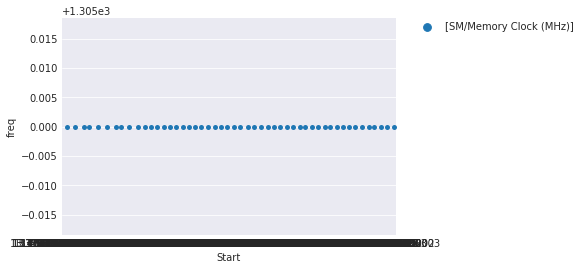

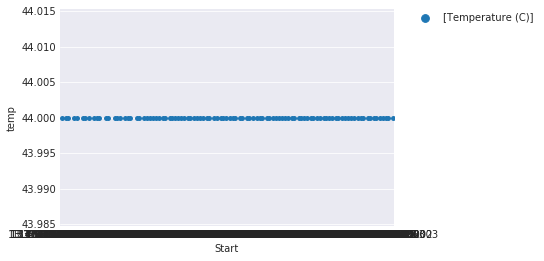

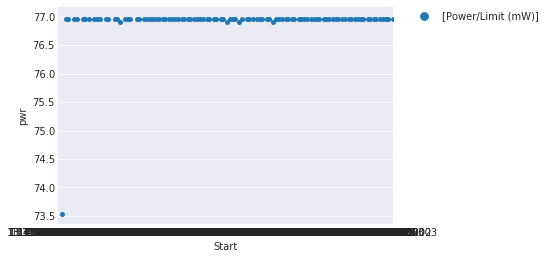

['test3', '100', '1408', '2'] ['[CUDA memcpy PtoP]']
12.299118


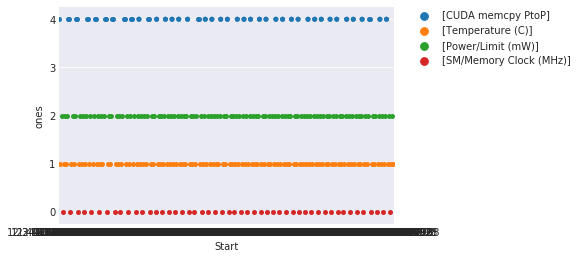

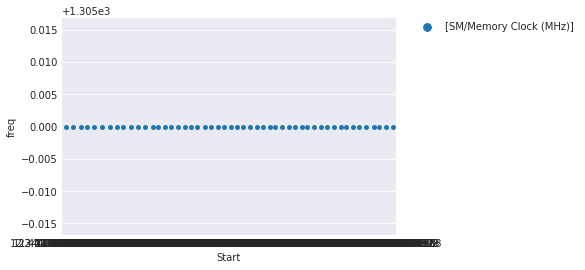

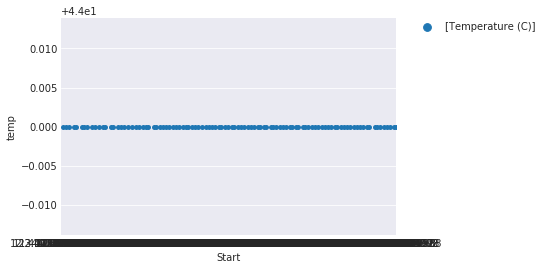

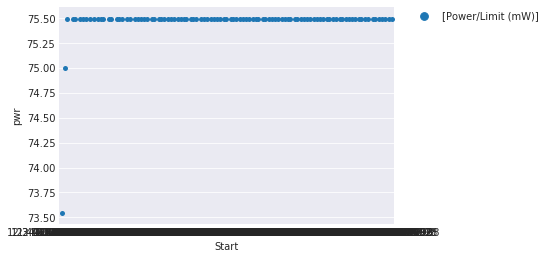

['test3', '100', '512', '1'] ['[CUDA memcpy PtoP]']
5.242764


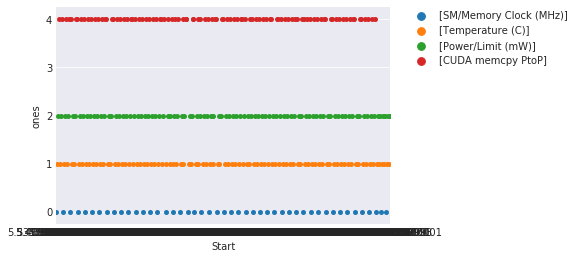

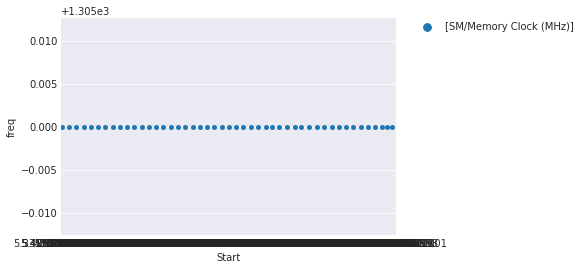

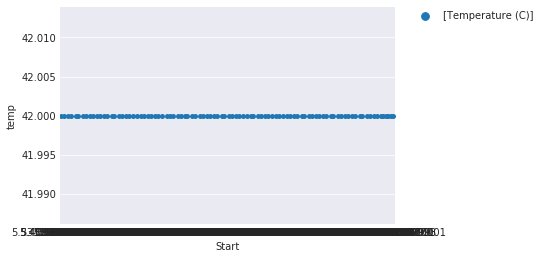

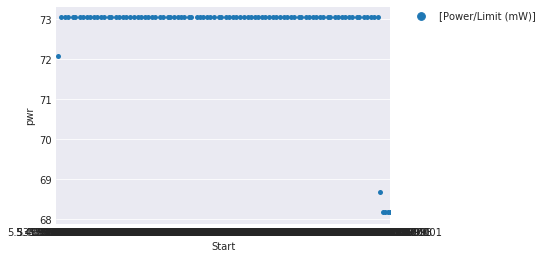

['test3', '100', '1920', '1'] ['[CUDA memcpy PtoP]']
16.393254000000002


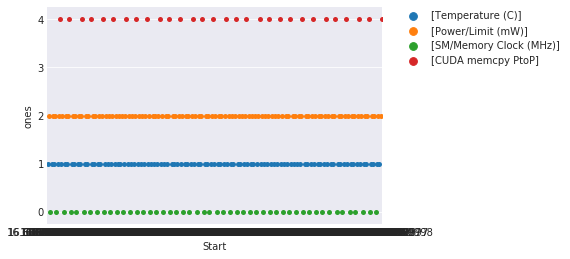

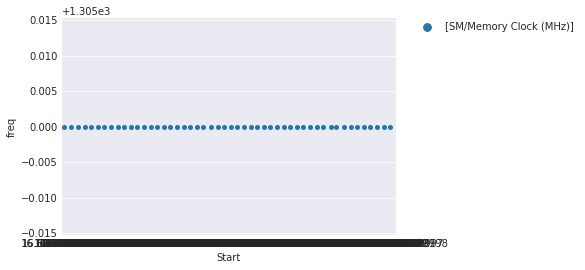

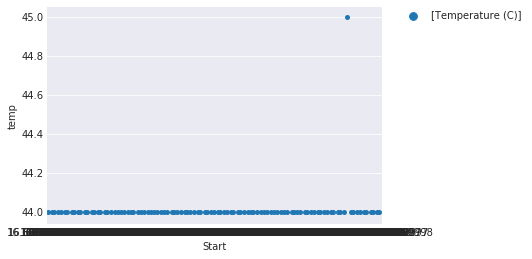

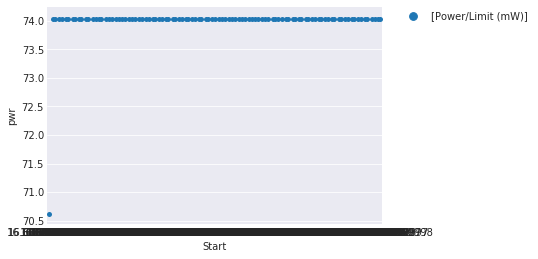

['test3', '100', '768', '2'] ['[CUDA memcpy PtoP]']
7.2696320000000005


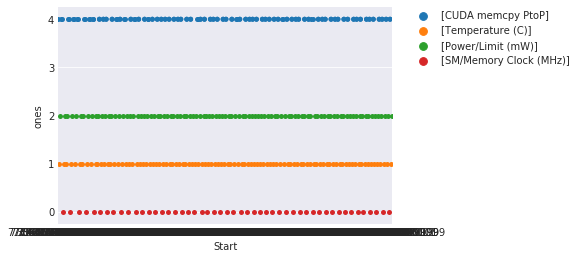

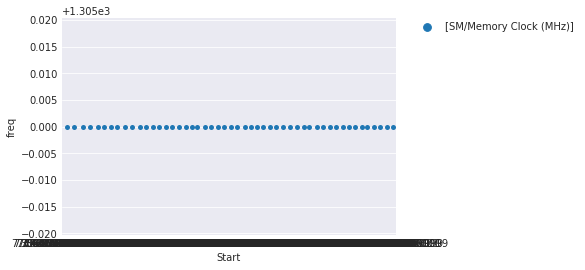

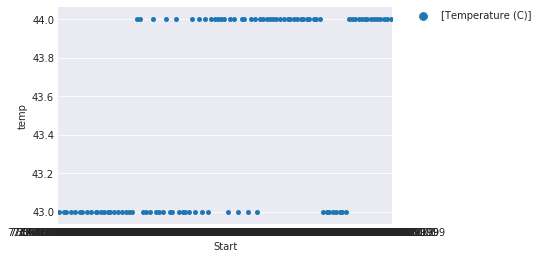

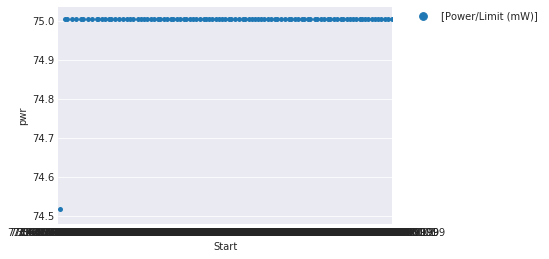

['test3', '100', '896', '2'] ['[CUDA memcpy PtoP]']
8.286789


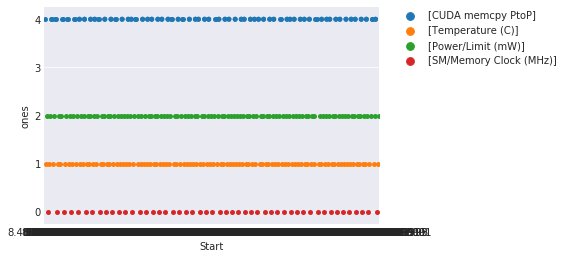

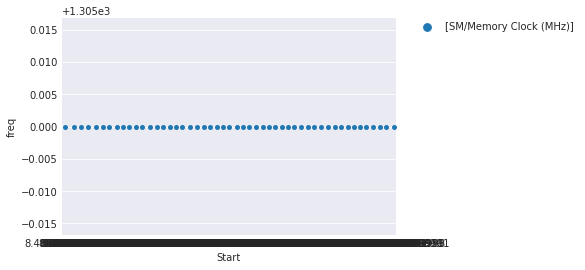

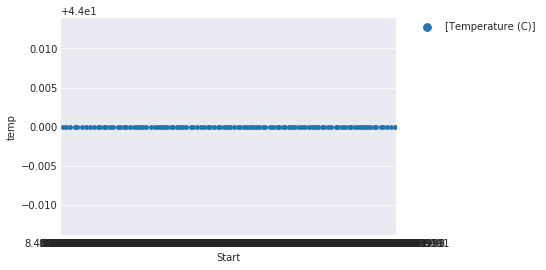

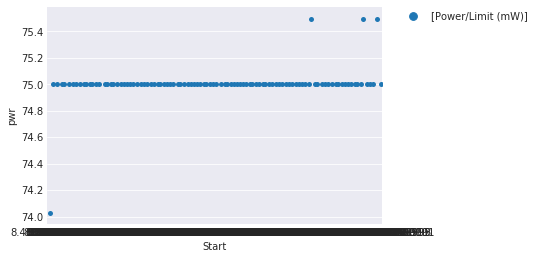

['test3', '100', '1792', '3'] ['[CUDA memcpy PtoP]']
15.372979


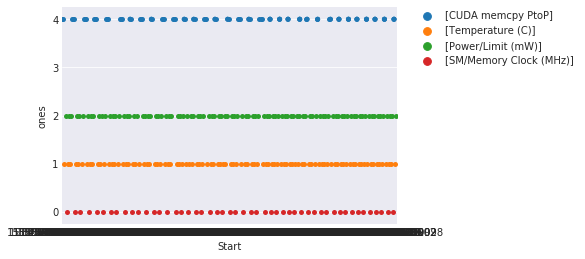

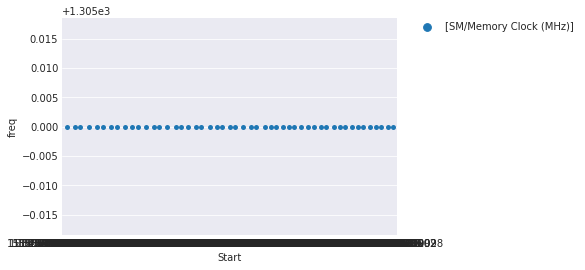

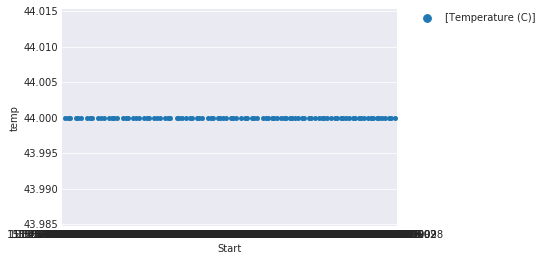

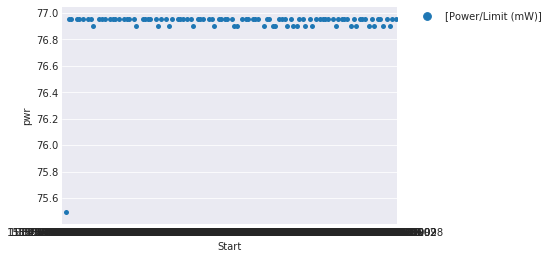

['test3', '100', '1920', '3'] ['[CUDA memcpy PtoP]']
16.411245


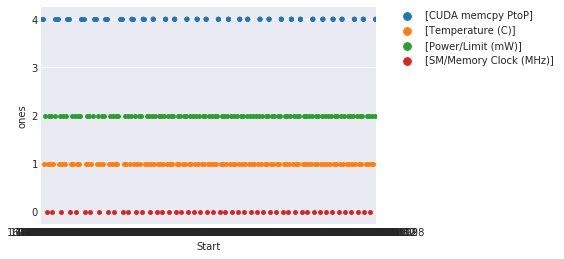

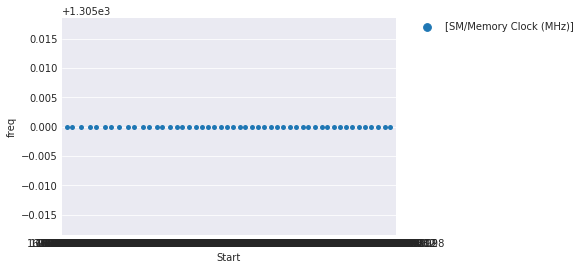

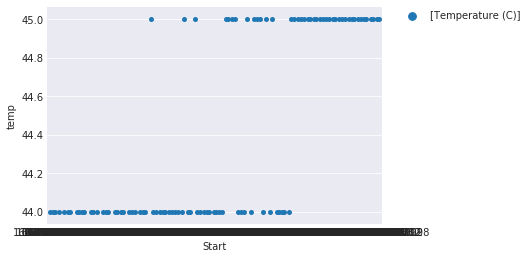

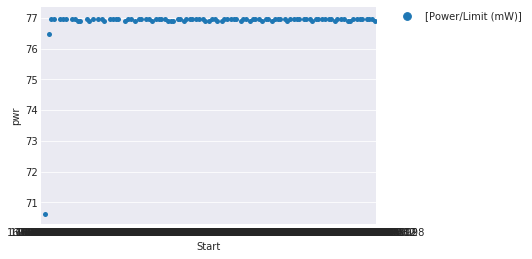

['test3', '100', '1920', '2'] ['[CUDA memcpy PtoP]']
16.397612


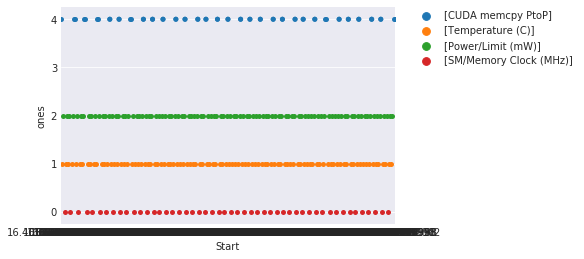

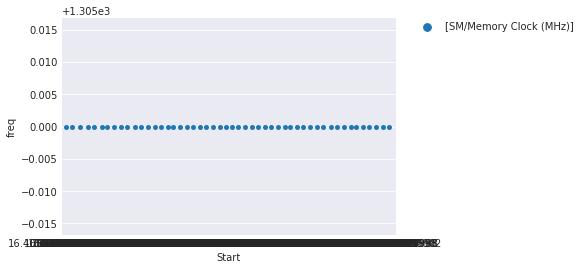

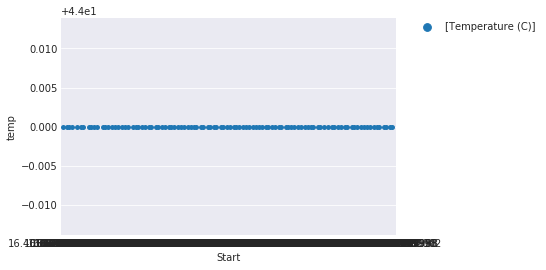

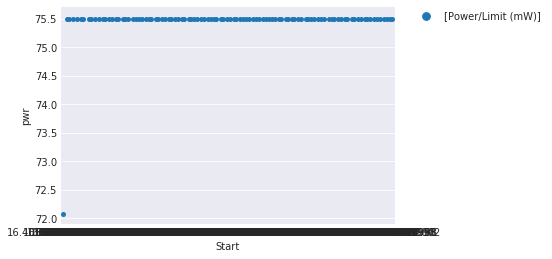

['test3', '100', '1280', '1'] ['[CUDA memcpy PtoP]']
11.320011000000001


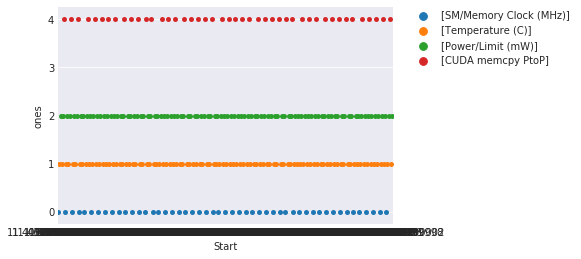

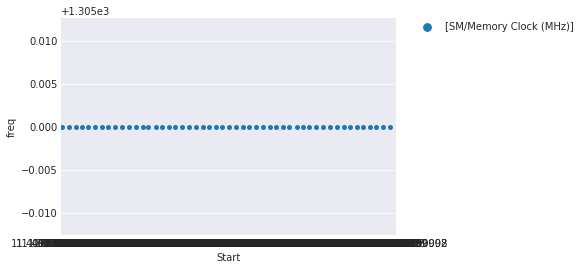

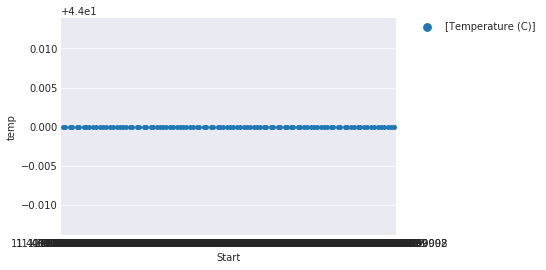

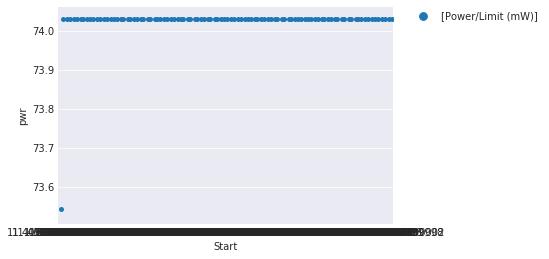

['test3', '100', '1280', '3'] ['[CUDA memcpy PtoP]']
11.330719


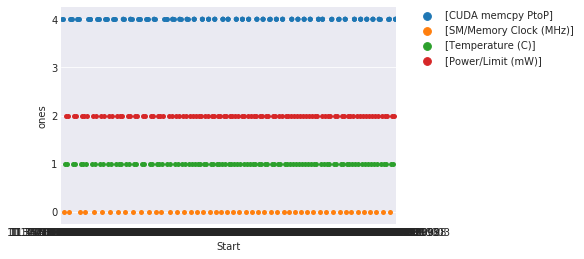

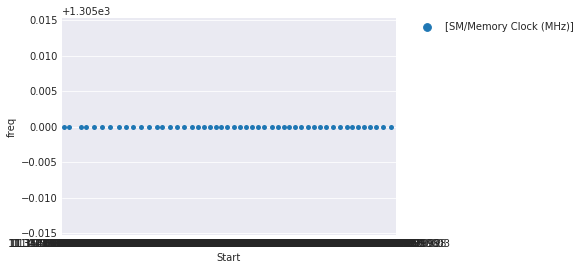

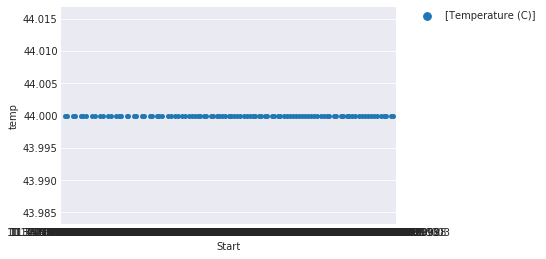

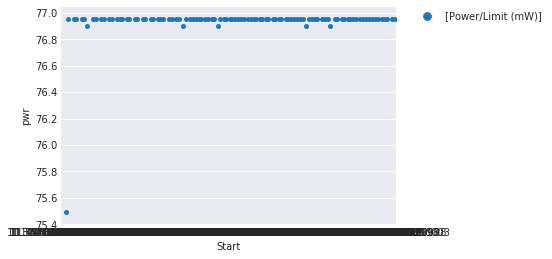

In [17]:
for k, v in df_dict.items():
    if "test3" in k:
        li = k.split("_")
        if len(li) > 3:
            print(li, [i for i in v.streams if 'PtoP' in i])
            kern = [i for i in v.streams if 'PtoP' in i][0]
            min_start = v.data[(v.data.Device == v.devices[0]) & (v.data.Name == kern)].Start.min()
            print(min_start)
            a = v.data[(v.data.Device == v.devices[0])& ((v.data.Start > min_start) & (v.data.Start < min_start+5))]
            sns.stripplot(x='Start', y='ones', hue='Name', data=a)
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            plt.show()

            for item, val in system_types.items():
                sns.stripplot(x='Start', y=item, hue='Name', hue_order=[val[0]], data=a)
                plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                plt.show()


## Sgemm Profile

In [83]:
base_dir = "./run_setup"
# base_dir = "./new_strategy"
file_dict = {f.split(".")[0]:os.path.join(base_dir,f) for f in os.listdir(base_dir) if "csv" in f }
# file_dict = sorted(file_dict)
df_dict = {k:read_nvprof_gpu_trace(v) for k,v in file_dict.items()}

['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'System', 'Name', 'Correlation_ID']
36324
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy DtoH]': 3, '[CUDA memcpy HtoD]': 4, 'volta_sgemm_128x32_sliced1x4_nn': 5}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'System', 'Name', 'Correlation_ID']
88977
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy DtoH]': 3, '[CUDA memcpy HtoD]': 4, 'volta_sgemm_128x32_sliced1x4_nn': 5}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem'

['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'System', 'Name', 'Correlation_ID']
1103825
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy DtoH]': 3, '[CUDA memcpy HtoD]': 4, 'volta_sgemm_128x32_sliced1x4_nn': 5}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'System', 'Name', 'Correlation_ID']
45312
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy DtoH]': 3, '[CUDA memcpy HtoD]': 4, 'volta_sgemm_128x32_sliced1x4_nn': 5}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMe

['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'System', 'Name', 'Correlation_ID']
34166
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy DtoH]': 3, '[CUDA memcpy HtoD]': 4, 'volta_sgemm_128x32_sliced1x4_nn': 5}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'System', 'Name', 'Correlation_ID']
16846
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy DtoH]': 3, '[CUDA memcpy HtoD]': 4, 'volta_sgemm_128x32_sliced1x4_nn': 5}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem'

['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'System', 'Name', 'Correlation_ID']
7134
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy DtoH]': 3, '[CUDA memcpy HtoD]': 4, 'volta_sgemm_128x32_sliced1x4_nn': 5}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'System', 'Name', 'Correlation_ID']
56687
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy DtoH]': 3, '[CUDA memcpy HtoD]': 4, 'volta_sgemm_128x32_sliced1x4_nn': 5}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem',

{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy DtoH]': 3, '[CUDA memcpy HtoD]': 4, 'volta_sgemm_128x32_sliced1x4_nn': 5}
['Start', 'Duration', 'Grid X', 'Grid Y', 'Grid Z', 'Block X', 'Block Y', 'Block Z', 'Registers Per Thread', 'Static SMem', 'Dynamic SMem', 'Size', 'Throughput', 'SrcMemType', 'DstMemType', 'Device', 'Context', 'Stream', 'System', 'Name', 'Correlation_ID']
207126
{'[SM/Memory Clock (MHz)]': 0, '[Temperature (C)]': 1, '[Power/Limit (mW)]': 2, '[CUDA memcpy DtoH]': 3, '[CUDA memcpy HtoD]': 4, 'volta_sgemm_128x32_sliced1x4_nn': 5}


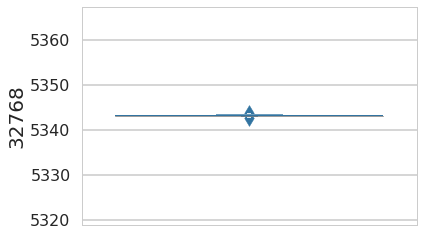

['test1', '32768', 100, 5343.1690100000005, 34]


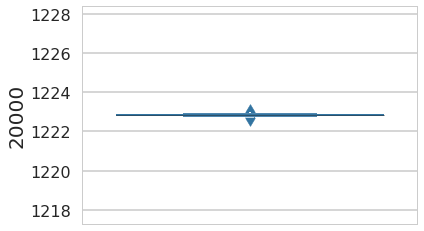

['test1', '20000', 100, 1222.8385899999998, 8]


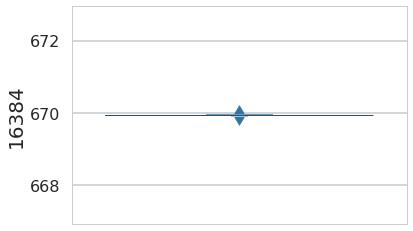

['test1', '16384', 100, 669.93062062, 5]


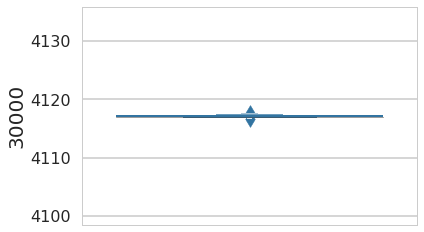

['test1', '30000', 100, 4117.10388, 26]


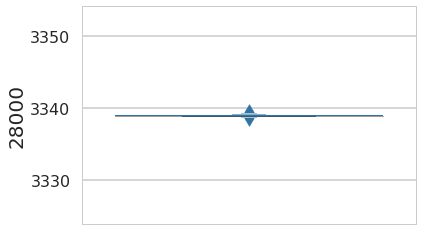

['test1', '28000', 100, 3338.9312500000015, 21]


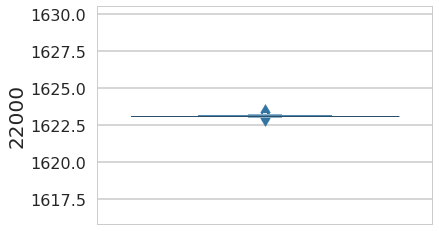

['test1', '22000', 100, 1623.0950499999997, 11]


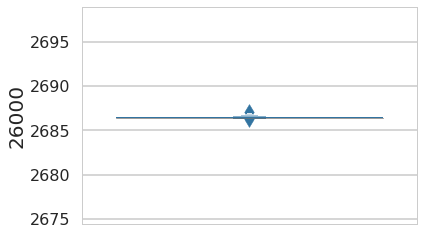

['test1', '26000', 100, 2686.44281, 17]


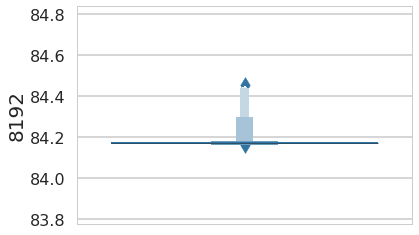

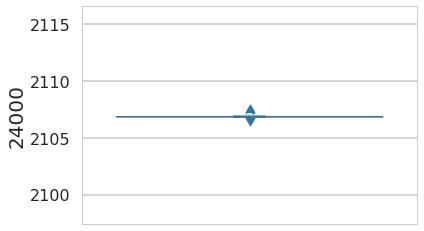

['test1', '24000', 100, 2106.878560000001, 14]


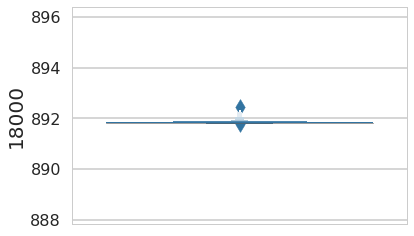

['test1', '18000', 100, 891.84881031, 6]


In [84]:
data = []
a = None
for k, v in df_dict.items():
    if "test3" in k:
        continue
    if "test1" in k:
        max_sgemm_time = v.data[v.data.Name == [i for i in v.streams if "sgemm" in i][0]].Duration.mean()
        if v.unit['Duration'] == 's':
            max_sgemm_time = max_sgemm_time*1000
            v.data['Duration'] = v.data['Duration']*1000
        li = k.split("_")
        if int(li[-1]) == 100:
#             print([i for i in v.streams if "sgemm" in i][0])
#             print(li)
            a = v.data
            v.data[li[1]] = v.data['Duration']
            sns.boxenplot(y=li[1], data=v.data[v.data.Name == 'volta_sgemm_128x32_sliced1x4_nn'])
            plt.show()
            
            li[-1] = int(li[-1])
            li.append( max_sgemm_time)
            if max_sgemm_time <= 10:
                li.append(math.ceil(max_sgemm_time/0.16))
            else:
                li.append(math.ceil(max_sgemm_time/160))
            if li[-1] > 2:
                data.append(li)
                print(li)

In [85]:
collect = []
titles = ['exp', 'inputSize', 'reps', 'kernel', 'minStart', 'maxStart', 'numStart', 'avgDuration', 'avgThroughput','freq','temp','pwr']
for k, v in df_dict.items():
    if "test2" in k:
        li = k.split("_")
        if len(li) > 3:
            out_list = []
            for it in li:
                out_list.append(it)
                print(it, end=',')
            print([i for i in v.streams if 'sgemm' in i][0], end=',')
            kern = [i for i in v.streams if 'sgemm' in i][0]
            out_list.append(kern)
            min_start = v.data[(v.data.Device == v.devices[0]) & (v.data.Name == kern)].Start.min()
            max_start = v.data[(v.data.Device == v.devices[0]) & (v.data.Name == kern)].Start.max()
            count = v.data[(v.data.Device == v.devices[0]) & (v.data.Name == kern)].Start.count()
            print(min_start, max_start, count, sep=',', end=',')
            out_list.append(min_start)
            out_list.append(max_start)
            out_list.append(count)
            a = v.data[(v.data.Device == v.devices[0])& ((v.data.Start > min_start) & (v.data.Start < max_start))]
            print(a[a.Name==kern].Duration.mean(), end=',')
            print(a[a.Name==kern].Throughput.mean(), end=',')
            if v.unit['Duration'] == 'ms':
                out_list.append(a[a.Name==kern].Duration.mean())
            else:
                out_list.append(a[a.Name==kern].Duration.mean()*1000)
            out_list.append(a[a.Name==kern].Throughput.mean())
#             sns.stripplot(x='Start', y='ones', hue='Name', data=a)
#             plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#             plt.show()

            for item, val in system_types.items():
                  print(a[a.Name==val[0]][item].mean(), end=',')
                  out_list.append(a[a.Name==val[0]][item].mean())
#                 sns.stripplot(x='Start', y=item, hue='Name', hue_order=[val[0]], data=a)
#                 plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#                 plt.show()
            print("\n",end='')
            collect.append(out_list)

test2,30000,26,100,volta_sgemm_128x32_sliced1x4_nn,6.357227,425.863771,100,4.117252306122448,nan,1305.0,72.246126340882,274.7173637663869,
test2,32768,34,100,volta_sgemm_128x32_sliced1x4_nn,6.811025,555.37739,100,5.343198316326531,nan,1305.0,72.46568225321302,272.3165355026825,
test2,16384,5,100,volta_sgemm_128x32_sliced1x4_nn,4.621709,85.301833,100,669.9866582346938,nan,1305.0,59.94361833952912,222.20424225526634,
test2,24000,14,100,volta_sgemm_128x32_sliced1x4_nn,5.425157,231.320133,100,2.1069455306122453,nan,1305.0,71.95241257193449,260.94474059318543,
test2,26000,17,100,volta_sgemm_128x32_sliced1x4_nn,5.6988129999999995,279.976285,100,2.686577846938776,nan,1305.0,72.93637192342753,273.5249671832291,
test2,28000,21,100,volta_sgemm_128x32_sliced1x4_nn,6.010944,344.824923,100,3.3389352857142875,nan,1305.0,71.59371310507674,269.7791556965734,
test2,20000,8,100,volta_sgemm_128x32_sliced1x4_nn,5.0045269999999995,134.095032,100,1.2228797040816324,nan,1305.0,71.70631538163502,260.913691204

In [86]:
titles = ['exp', 'inputSize', 'inner_reps','reps', 'kernel', 'minStart', 'maxStart', 'numStart', 'avgDuration', 'avgThroughput','freq','temp','pwr']

In [87]:
collectdf = pd.DataFrame(data=collect, columns=titles)
collectdf.sort_values(by='inputSize', inplace=True)
o =list(collectdf.inputSize.unique())
print(o)
o = [int(i) for i in o]
o.sort()
o = [str(i) for i in o] 
collectdf.columns

['16384', '18000', '20000', '22000', '24000', '26000', '28000', '30000', '32768']


Index(['exp', 'inputSize', 'inner_reps', 'reps', 'kernel', 'minStart',
       'maxStart', 'numStart', 'avgDuration', 'avgThroughput', 'freq', 'temp',
       'pwr'],
      dtype='object')

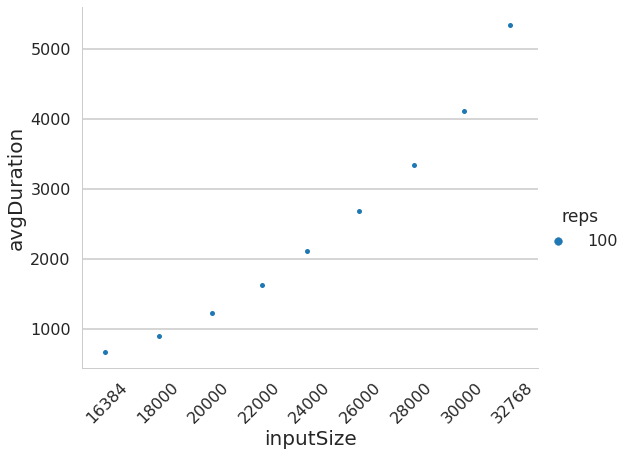

In [90]:
charts = sns.catplot(x='inputSize', y='avgDuration', hue='reps', data=collectdf, order=o, aspect=1.3, height=6)
for chart in charts.axes.flat:
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

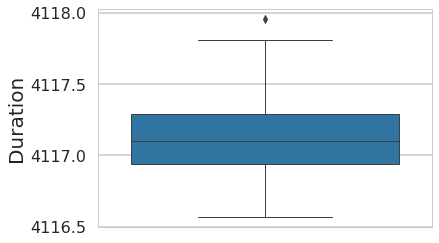

In [58]:
sns.boxplot(y='Duration',data=v.data[v.data.Name == 'volta_sgemm_128x32_sliced1x4_nn'])

In [52]:
sns.pointplot(x='Start', y='ones', hue='Name', data=a)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ValueError: Could not interpret input 'Start'

In [47]:
df = pd.DataFrame(data, columns=['test', 'size', 'outer', 'max_sgemm_time','inner'])

In [ ]:
df.sort_values(by=['size','outer'], inplace=True)

In [ ]:
for i,z in zip(list(df['size'].unique()), list(df['inner'].unique())):
    print(z," ", sep='', end="")

In [ ]:
a